# TA Dataset Analysis

Returns useful values such as:

For one city

- dominant cuisine styles
- total reviews
- occurencies of cuisine styles
- number of restaurants/local population
- Number of restaurants that offer gluten-free or veg possibilities

Europe
- European scale: top 3 cuisine styles, total restaurants, 
- top 10 restaurants cuisine styles: common points
- QGIS for localized visualisation
- comparison capitals:
    - number restaurants
    - dominant style
    - caracteristics (cuisine styles, number of reviews) of top 20 restaurants of each city (using dict count)
    - number restaurant, total reviews -ratio/habitant
    - number resto/number toursit per year  http://ec.europa.eu/eurostat/statistics-explained/index.php/Tourism_statistics

In [1]:
#! /usr/bin/env python3
# coding: utf-8

import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
#import seaborn as sns ; sns.set(color_codes=True)

In [2]:
#Enable display of info messages
logging.basicConfig(level=logging.INFO)

## Exploration

In [3]:
#load dataset
dataset = pd.read_csv('TA_restaurants_curated.csv', encoding='utf8', index_col=0)
print(dataset.head(), '\n')
print(dataset.tail(), '\n')
print(dataset.info())

                         Name       City  \
0  Martine of Martine's Table  Amsterdam   
1         De Silveren Spiegel  Amsterdam   
2                     La Rive  Amsterdam   
3                    Vinkeles  Amsterdam   
4   Librije's Zusje Amsterdam  Amsterdam   

                                       Cuisine Style  Ranking  Rating  \
0                    ['French', 'Dutch', 'European']      1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...      3.0     4.5   
3  ['French', 'European', 'International', 'Conte...      4.0     5.0   
4  ['Dutch', 'European', 'International', 'Vegeta...      5.0     4.5   

  Price Range  Number of Reviews  \
0    $$ - $$$              136.0   
1        $$$$              812.0   
2        $$$$              567.0   
3        $$$$              564.0   
4        $$$$              316.0   

                                             Reviews  \
0  [['Just like home', 

In [4]:
#Turn city and price range columns into categorical type
#dataset_categorized = dataset
#dataset_categorized['City'] = dataset_categorized['City'].astype('category')
#dataset_categorized['Price Range'] = dataset_categorized['Price Range'].astype('category')
#print(dataset_categorized.info())

As a result of categorization, less memory usage

### Number of restaurants per city
- How many restaurants are there, and how many per city ?


 Sorted by number of restaurants 

London        18212
Paris         14874
Madrid         9543
Barcelona      8425
Berlin         7078
Milan          6687
Rome           5949
Prague         4859
Lisbon         4153
Vienna         3724
Amsterdam      3434
Hamburg        3131
Munich         2995
Bruxelles      2945
Lyon           2930
Stockholm      2705
Budapest       2606
Warsaw         2352
Copenhagen     2109
Dublin         2082
Athens         1938
Edinburgh      1865
Zurich         1667
Oporto         1575
Geneva         1572
Krakow         1354
Helsinki       1228
Oslo           1213
Bratislava     1070
Luxembourg      657
Ljubljana       501
Name: City, dtype: int64

 Total number of restaurants: 125433


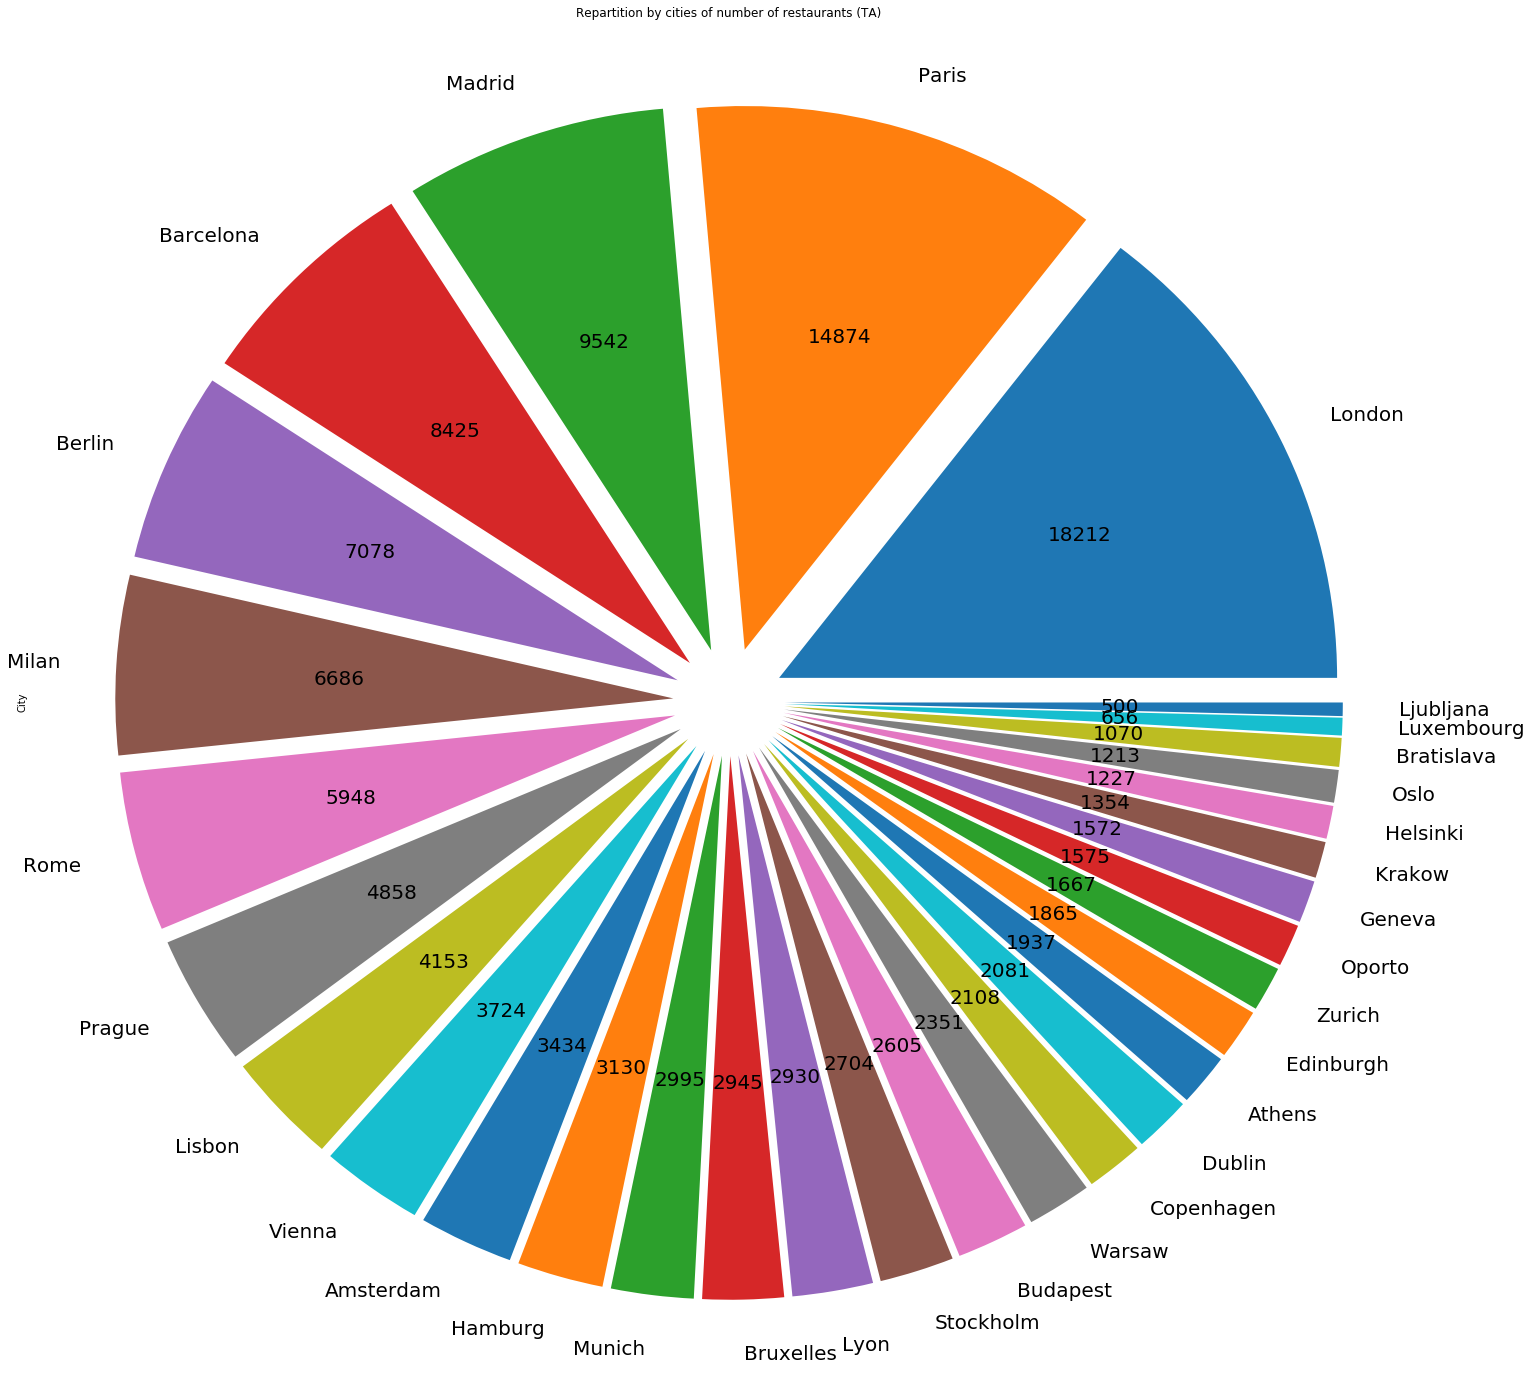

In [4]:
#Get sorting of cities by number of restaurants
global_number_rest = dataset['City'].value_counts(dropna=False)
print("\n Sorted by number of restaurants \n")
print(global_number_rest)
total_rest = global_number_rest.sum()
print("\n Total number of restaurants: {}".format(total_rest))

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html
explode = [0.1 for i in global_number_rest]
global_number_rest.plot(kind='pie', figsize=(25, 25), explode=explode, fontsize=20, autopct=lambda v: int(v*total_rest/100),
                        title="Repartition by cities of number of restaurants (TA)")
plt.savefig('figures/restaurants repartition by city.png')
plt.savefig('figures/restaurants repartition by city.svg')
plt.show()

### Number of restaurants per inhabitants & km²
- How many restaurants per inhabitants and km² are there ?

In [5]:
#Wikipedia: city population
pop_dict = {'London': 8673713, 'Paris': 2220445, 'Madrid':  3141991, 'Barcelona': 1620809, 'Berlin': 3520031,
           'Milan': 1368590, 'Rome': 2877215, 'Prague': 1280508, 'Lisbon': 545245, 'Vienna': 1840573, 'Amsterdam':840486,
                'Munich': 1548319, 'Hamburg': 1787408, 'Bruxelles': 176545, 'Stockholm': 1515017, 'Budapest': 1733685,
                'Warsaw': 1726581, 'Copenhagen':  602481, 'Dublin': 5276120, 'Lyon': 513275, 'Athens': 664046,
                'Edinburgh': 482640, 'Zurich': 402762, 'Oporto': 237591, 'Geneva': 201813, 'Krakow': 758334, 
                'Helsinki': 642045, 'Oslo': 623966, 'Bratislava': 455800, 'Luxembourg': 115227, 'Ljubljana':280278}

#Wikipedia: Area of the city in km²
area_dict = {'London': 1575, 'Paris': 105.4, 'Madrid':  608, 'Barcelona': 100.4, 'Berlin': 3891.9,
           'Milan': 182, 'Rome': 1285.3, 'Prague': 496, 'Lisbon': 83.84, 'Vienna': 414.9, 'Amsterdam':219.3,
                'Munich': 310.4, 'Hamburg': 755.3, 'Bruxelles': 31.6, 'Stockholm': 414, 'Budapest': 525.1,
                'Warsaw': 517.24, 'Copenhagen':  88.25, 'Dublin': 115, 'Lyon': 47.9, 'Athens': 38,
                'Edinburgh': 259, 'Zurich': 87.9, 'Oporto': 41.3, 'Geneva': 15.9, 'Krakow': 326.8, 
                'Helsinki': 213.75, 'Oslo': 454, 'Bratislava': 367.6, 'Luxembourg': 51.7, 'Ljubljana': 275}

#Ratio of number of restaurants per tourists visiting ?

#Dataframe creation
pop_rest_df = pd.DataFrame()
pop_rest_df['Restaurants'] = global_number_rest
pop_rest_df['Population'] = pd.DataFrame([pop_dict]).T
pop_rest_df['Resto/1000 Inhabitants'] = 1000 * pop_rest_df['Restaurants'] / pop_rest_df['Population']
pop_rest_df['Area'] = pd.DataFrame([area_dict]).T
pop_rest_df['Resto/km²'] = pop_rest_df['Restaurants'] / pop_rest_df['Area']
pop_rest_df = pop_rest_df.sort_values('Resto/1000 Inhabitants', ascending=False)
print(pop_rest_df.head(10), '\n')

print(pop_rest_df.describe())

            Restaurants  Population  Resto/1000 Inhabitants    Area  \
Bruxelles          2945      176545               16.681299   31.60   
Geneva             1572      201813                7.789389   15.90   
Lisbon             4153      545245                7.616759   83.84   
Paris             14874     2220445                6.698657  105.40   
Oporto             1575      237591                6.629039   41.30   
Lyon               2930      513275                5.708441   47.90   
Luxembourg          657      115227                5.701789   51.70   
Barcelona          8425     1620809                5.198021  100.40   
Milan              6687     1368590                4.886051  182.00   
Zurich             1667      402762                4.138921   87.90   

             Resto/km²  
Bruxelles    93.196203  
Geneva       98.867925  
Lisbon       49.534828  
Paris       141.119545  
Oporto       38.135593  
Lyon         61.169102  
Luxembourg   12.707930  
Barcelona    83.91

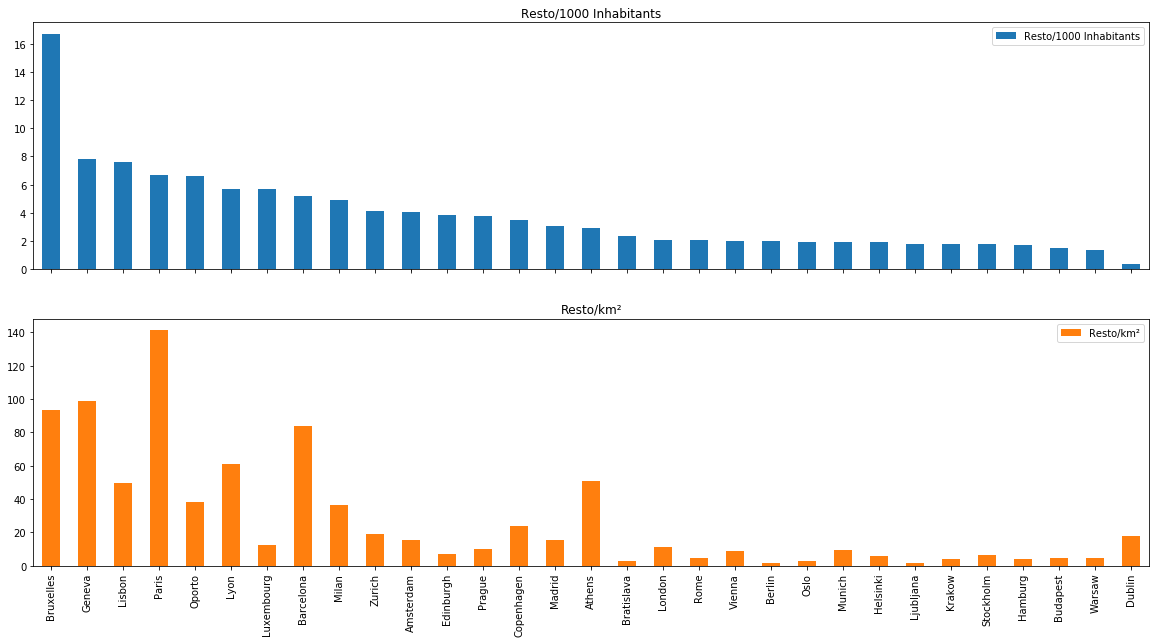

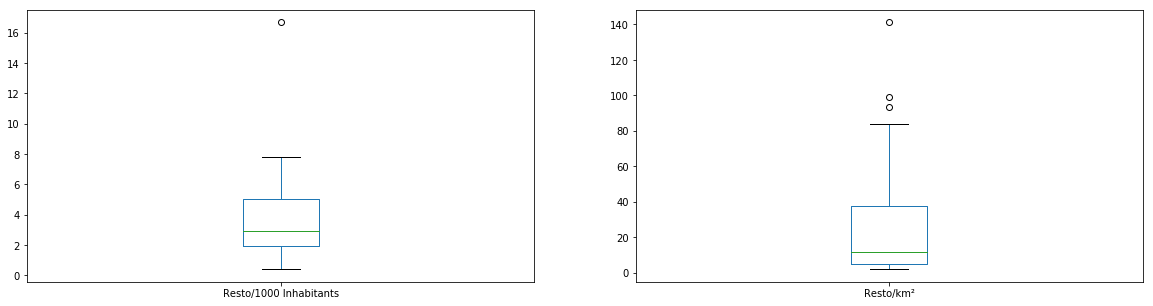

In [6]:
#Visualization with bar plot
pop_rest_df.plot(kind='bar', subplots=True, y=['Resto/1000 Inhabitants', 'Resto/km²'], figsize=(20,10))
plt.savefig('figures/Densities.svg')
plt.savefig('figures/Densities.png')
plt.show()

#Visualization with boxplot:
pop_rest_df.plot(kind='box', subplots=True, y=['Resto/1000 Inhabitants', 'Resto/km²'], figsize=(20,5))
plt.savefig('figures/Densities_box.svg')
plt.savefig('figures/Densities_box.png')
plt.show()

## Price range analysis
### Dataframe building
- What is the price range répartition of restaurants, globally and in each city ?

In [38]:
#Replace NaN in the Price range column by 'Unknown' 
dataset['Price Range'] = dataset['Price Range'].fillna('Unknown')

#Get the count per price range globally
global_pricerange_count = dataset.groupby('Price Range')['Name'].count()

#Dataframe of count of global restaurants by price range
global_pricerange_count = pd.DataFrame({'Restaurants': global_pricerange_count})
global_pricerange_count['percent'] = global_pricerange_count['Restaurants'] / total_rest
global_pricerange_count.index.names = ['Price Range']
global_pricerange_count.index = ['low', 'mid', 'high', 'unknown']
print(global_pricerange_count)

#Get price range counts per city
pricerange_count_city = dataset.groupby(['Price Range', 'City'])['Name'].count() #Series
pricerange_count_city = pd.DataFrame(pricerange_count_city) #multi indexed df (price range, city)
pricerange_count_city.columns = ['Restaurants']
#Pivot table to get the price range as columns instead of rows index
pricerange_count_city = pricerange_count_city.pivot_table(index='City', columns='Price Range')
pricerange_count_city['Total'] = global_number_rest

#Add percentage columns
pricerange_count_city['% in low price range'] = pricerange_count_city['Restaurants']['$'] / pricerange_count_city['Total']
pricerange_count_city['% in mid price range'] = pricerange_count_city['Restaurants']['$$ - $$$'] / pricerange_count_city['Total']
pricerange_count_city['% in high price range'] = pricerange_count_city['Restaurants']['$$$$'] / pricerange_count_city['Total']
pricerange_count_city['% unknown price range'] = pricerange_count_city['Restaurants']['Unknown'] / pricerange_count_city['Total']
print(pricerange_count_city.head())

#Statistical exploration
print('\n', pricerange_count_city['Restaurants'].describe())

         Restaurants   percent
low            18988  0.151380
mid            54317  0.433036
high            4300  0.034281
unknown        47828  0.381303
            Restaurants                       Total % in low price range  \
Price Range           $ $$ - $$$ $$$$ Unknown                              
City                                                                       
Amsterdam           546     1915  106     867  3434             0.158998   
Athens              458      737   67     676  1938             0.236326   
Barcelona          1464     3680  263    3018  8425             0.173769   
Berlin             1153     2366  134    3425  7078             0.162899   
Bratislava          118      331   25     596  1070             0.110280   

            % in mid price range % in high price range % unknown price range  
Price Range                                                                   
City                                                                          

### Visualizations

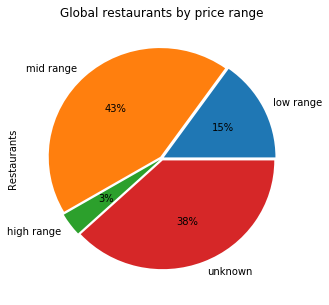

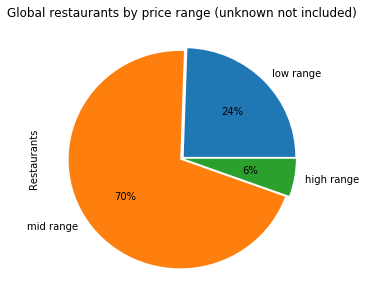

In [23]:
explode = [0.02 for i in range(4)]

#Global price range count with pie chart
global_pricerange_count.index = ['low range', 'mid range', 'high range', 'unknown'] #$$$$ label returns error
global_pricerange_count['Restaurants'].plot.pie(figsize=(5,5), legend=False, autopct='%.0f%%', explode=explode,
                                               title="Global restaurants by price range")
plt.savefig("Global price range rep.svg")
plt.savefig("Global price range rep.png")
plt.show()

#Global price range count with pie chart without unknown price range restaurants
global_pricerange_count.index = ['low range', 'mid range', 'high range', 'unknown'] #$$$$ label returns error
global_pricerange_count.iloc[0:3, 0].plot.pie(figsize=(5,5), legend=False, autopct='%.0f%%', explode=explode[:-1],
                                              title="Global restaurants by price range (unknown not included)")
plt.savefig("Global price range rep_unknow not included.svg")
plt.savefig("Global price range rep_unknown not included.png")
plt.show()

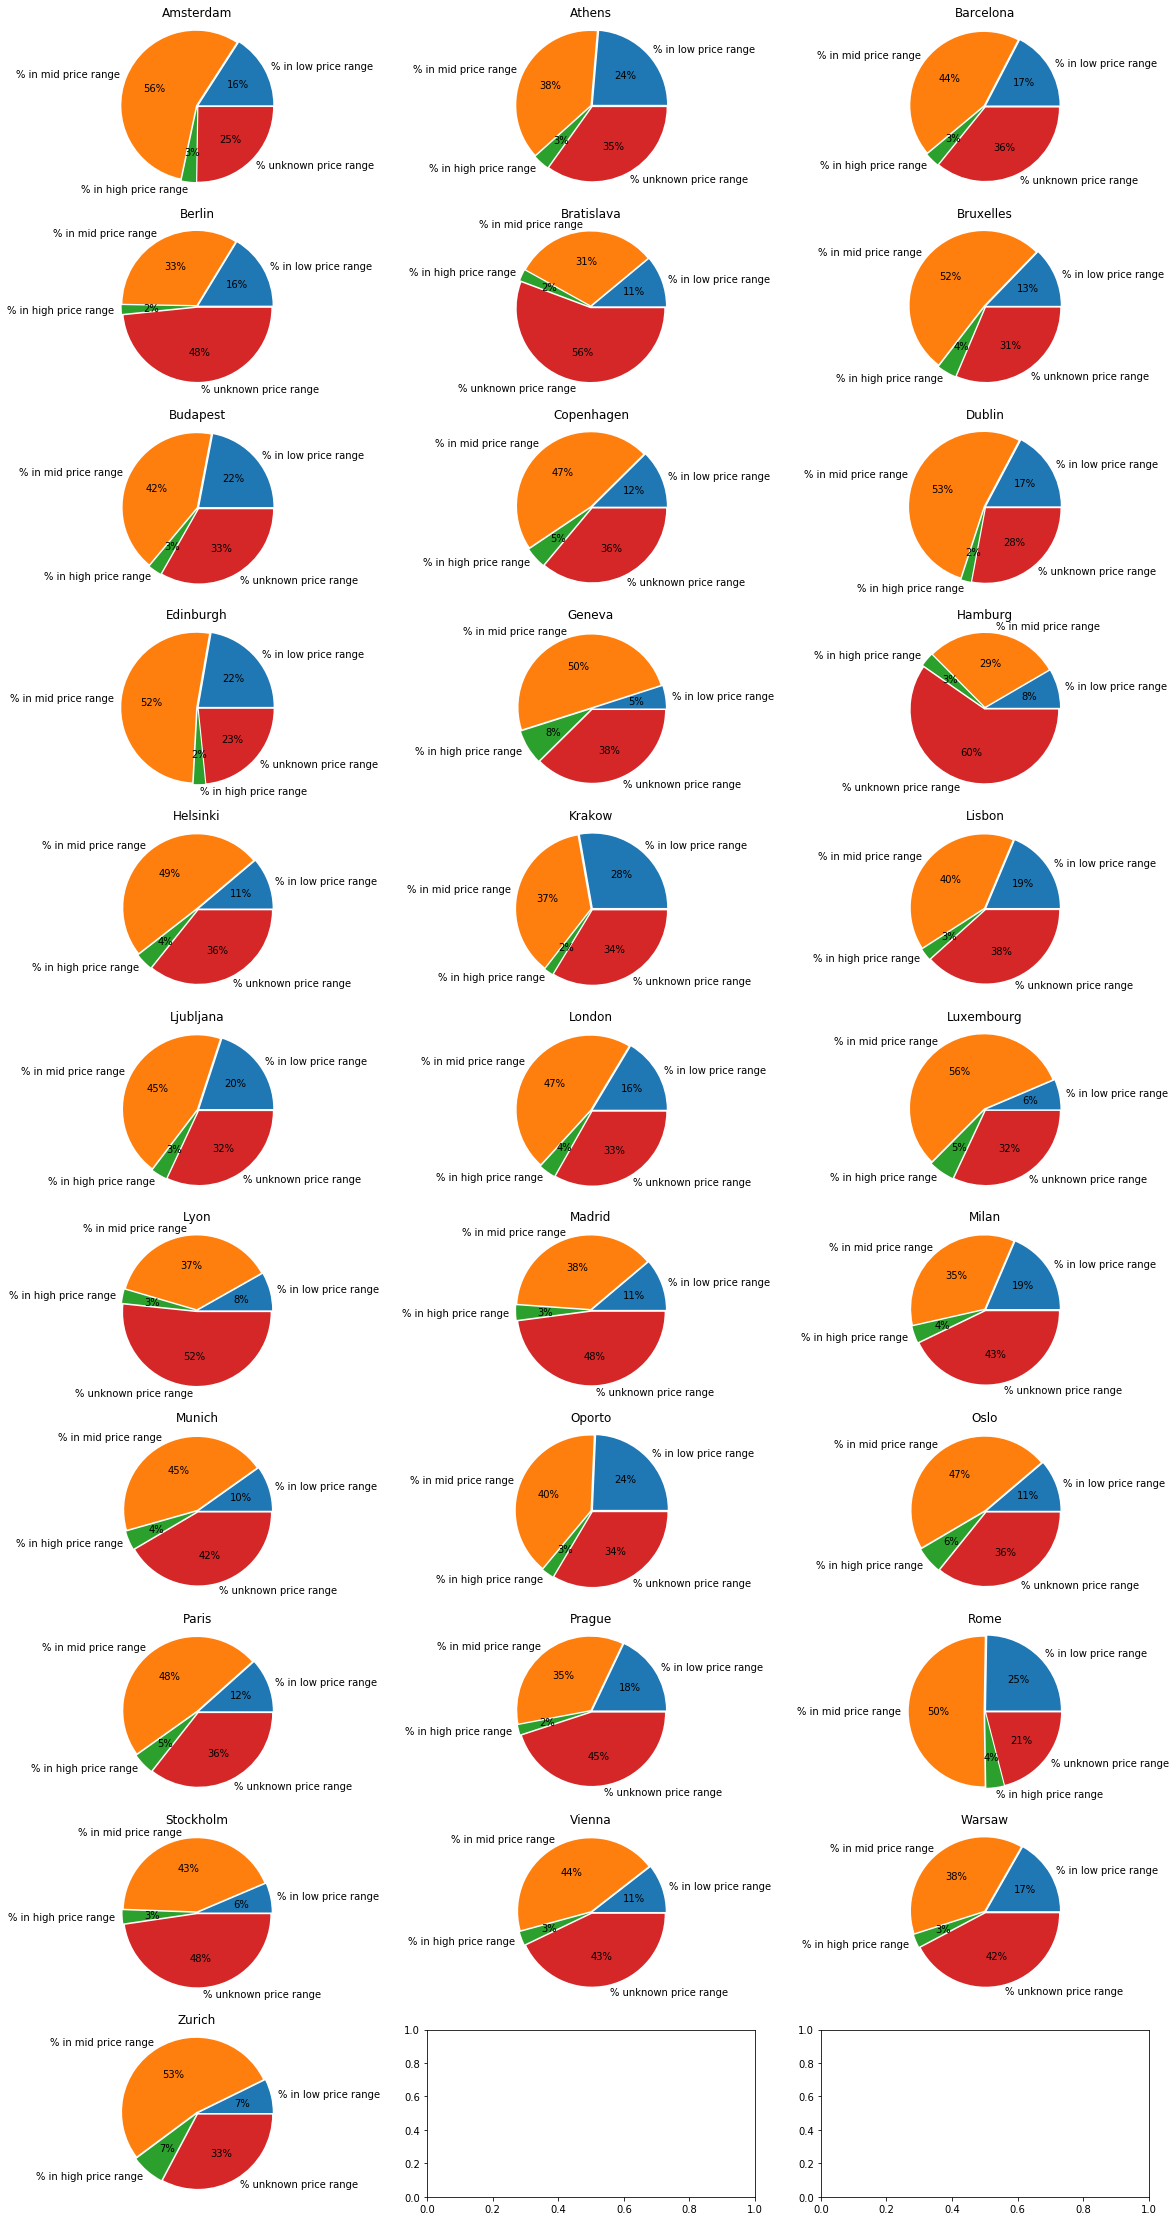

In [9]:
#Visualization with pie charts
height = int(np.ceil(len(global_number_rest)/3))
fig, axs = plt.subplots(height, 3, figsize=(20,40)) #organizes the pies according to a grid
r=0 ; h=0 #r is the position in the row, h is the position in the heigh
labels = [pricerange_count_city.iloc[:, 5:].columns[i][0] for i in range(4)]

for k in range(len(global_number_rest)): #over each line (city)
    city = pricerange_count_city.iloc[k, :].name
    table = pricerange_count_city.iloc[k, 5:].T

    axs[h, r].pie(table, labels=labels, autopct='%.0f%%', explode=explode)
    axs[h, r].axis('equal')
    axs[h, r].set(title=city)
    k += 1
    #Change line every 3rd pie
    if r < 2:
        r += 1       
    elif r == 2:
        r = 0
        h += 1
plt.savefig("figures/price_range_pies.png")
plt.savefig("figures/price_range_pies.svg")
plt.show()

In [16]:
#Per city with PIE plots (OTHER WAY)
while k < len(global_number_rest): #over each line (city)
    pricerange_count_city.iloc[k:k+2, 5:].T.plot(kind='pie', figsize=(40,10), subplots=True, legend=False, autopct='%.0f%%', 
                                        explode=explode, title="Restaurants per price range in each city", fontsize=20)
    k +=3
    plt.show()

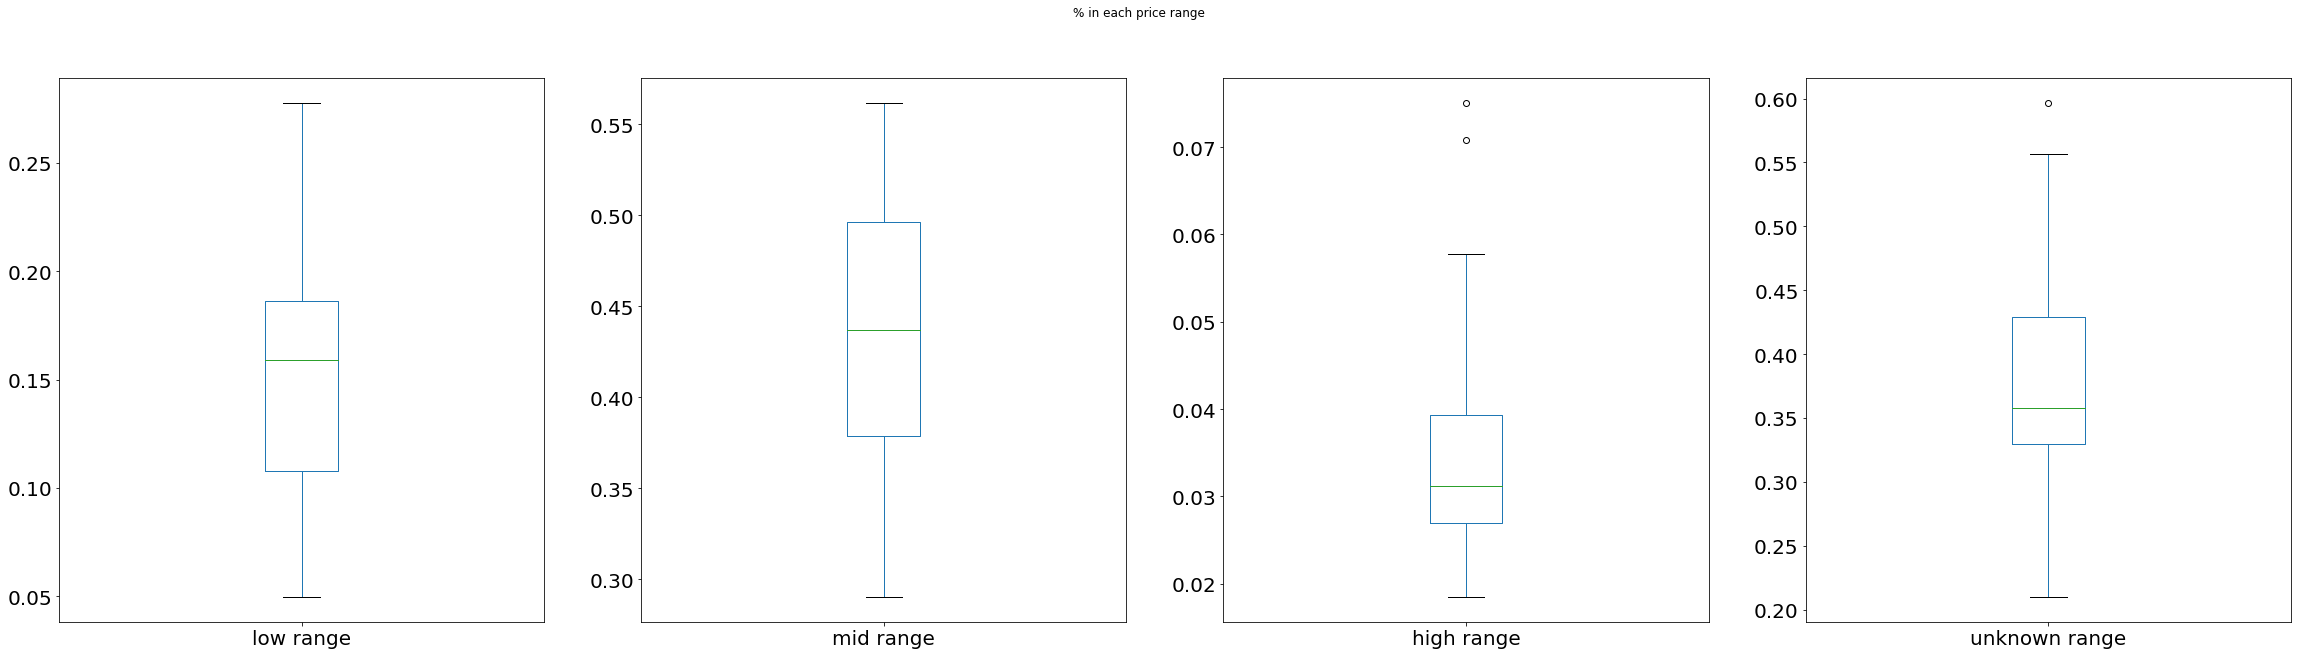

In [24]:
percent = pricerange_count_city.iloc[:, 5:]
percent.columns = ['low range', 'mid range', 'high range', 'unknown range']

#Visualization with box plots
percent.plot(kind='box', subplots=True, figsize=(40,10), title="% in each price range", fontsize=20)
plt.savefig('figures/price range rep boxplot.svg')
plt.savefig('figures/price range rep boxplot.png')
plt.show()

2 oustiders in the high price range

## Cuisine styles analysis
### Dataframe construction with cuisine styles counts
- What are the most famous cuisine styles globally and in each city ?

*Combine certain styles ? (Japanese+Sushi, pizza+italian, chinese+XiJan+minority chinese)*

*Check if when there is Sushi, there is Japanese also in the tags (sushi included in Japanese group, pizza included in Italian group)*

In [26]:
cuisine_df = dataset[['Cuisine Style', 'City']]

#Counting function to parse the cuisine styles lists
def cuisine_count(liste):
    cuisine_dict = {'Unknown': 0}
    for styles in liste:
        if styles is not np.nan:
            styles = ast.literal_eval(styles)  #recognize items as lists instead of string objects
            for style in styles:  #iterates over each cuisine style in the list
                if style in cuisine_dict:
                    cuisine_dict[style] += 1
                else :
                    cuisine_dict[style] = 1
        else:
            cuisine_dict['Unknown'] +=1
    return(cuisine_dict)
            
#Global cuisine styles count
global_cuisine_count = cuisine_count(cuisine_df['Cuisine Style'])
print("Total number of different cuisine styles :", len(global_cuisine_count))
print(global_cuisine_count)

#Count for each city and dataframe building
cuisine_count_df = pd.DataFrame()
for city in global_number_rest.index:
    city_cuisine = cuisine_count(cuisine_df[cuisine_df['City'] == city]['Cuisine Style'])
    city_cuisine = pd.DataFrame(city_cuisine, index=[city])
    cuisine_count_df = pd.concat([cuisine_count_df, city_cuisine])
cuisine_count_df = cuisine_count_df.fillna(0)  #Replace NaN by 0
print(cuisine_count_df.head(5))

#Statistical exploration
print(cuisine_count_df.describe())

Total number of different cuisine styles : 128
{'Unknown': 31369, 'French': 9550, 'Dutch': 888, 'European': 30221, 'Vegetarian Friendly': 32346, 'Gluten Free Options': 12116, 'Mediterranean': 18446, 'International': 4790, 'Vegan Options': 12947, 'Contemporary': 1611, 'Asian': 9057, 'Indonesian': 166, 'Japanese': 4479, 'Seafood': 4414, 'Fast Food': 5086, 'American': 4042, 'Bar': 9659, 'Central European': 4158, 'Pub': 7378, 'Cafe': 7428, 'British': 4832, 'Healthy': 1896, 'Indian': 3109, 'Tibetan': 73, 'Nepali': 262, 'Italian': 17763, 'Barbecue': 1672, 'Steakhouse': 1695, 'Latin': 853, 'Argentinean': 527, 'South American': 1227, 'Grill': 1590, 'Delicatessen': 1158, 'Pizza': 8303, 'Thai': 2297, 'Soups': 1645, 'Street Food': 872, 'Diner': 987, 'Lebanese': 900, 'Middle Eastern': 2330, 'Israeli': 222, 'New Zealand': 15, 'Chinese': 3675, 'Belgian': 806, 'Sushi': 3491, 'Spanish': 8226, 'Korean': 509, 'Turkish': 1407, 'Vietnamese': 1570, 'Irish': 832, 'German': 2074, 'Halal': 1669, 'Gastropub': 

### Visualization for each city
Total number of restaurants: 125 433

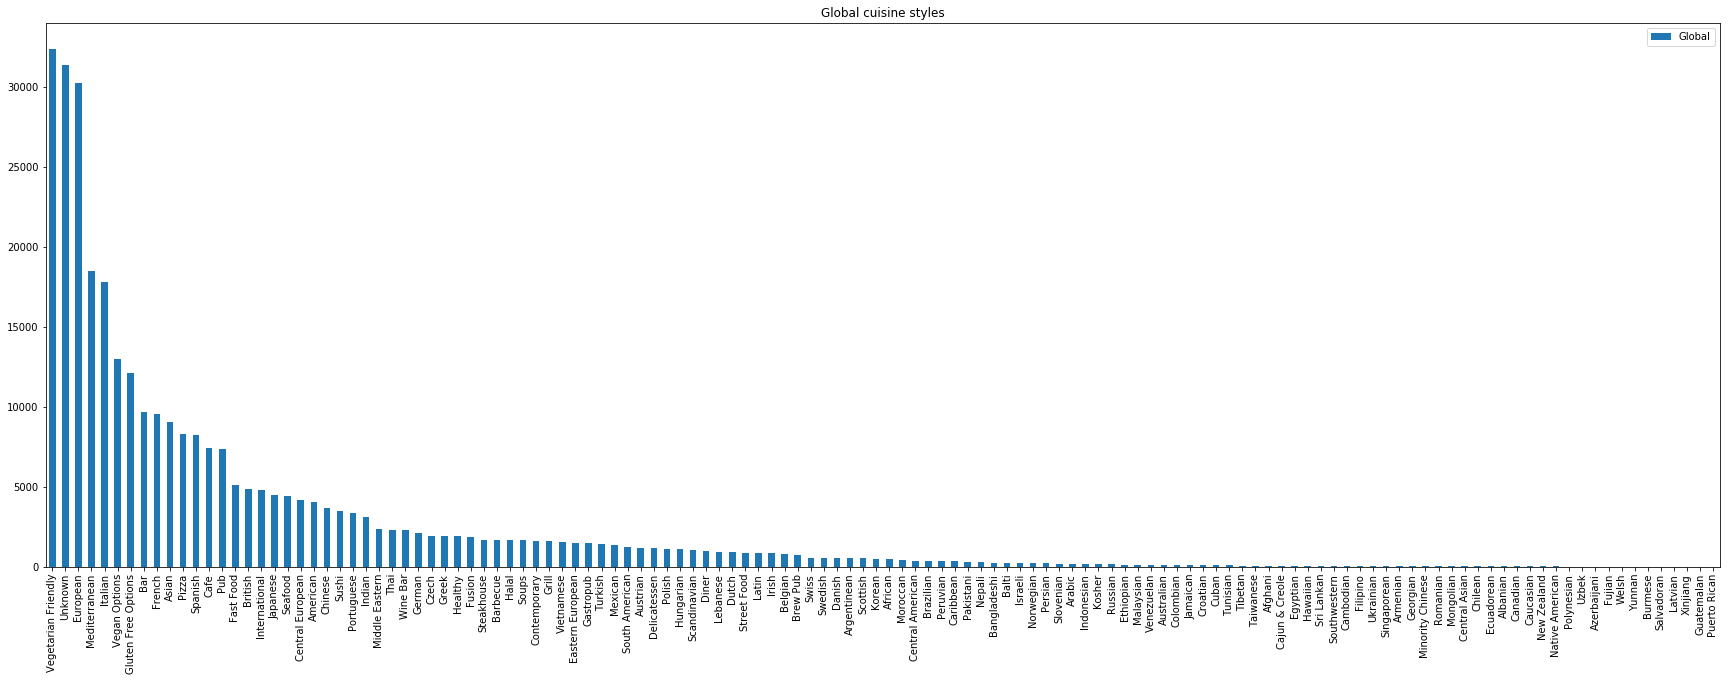

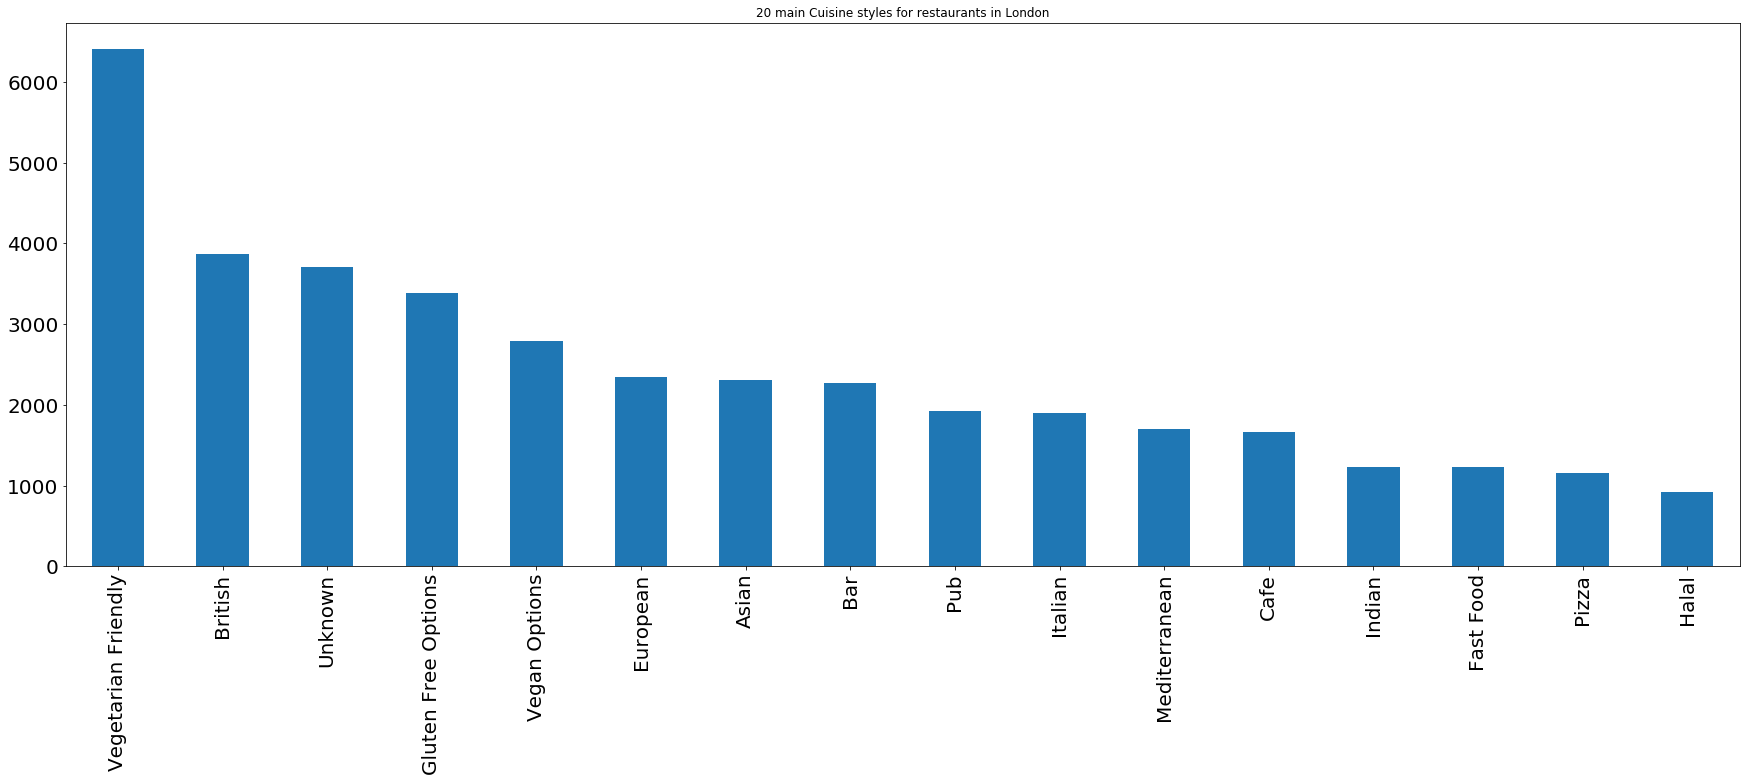

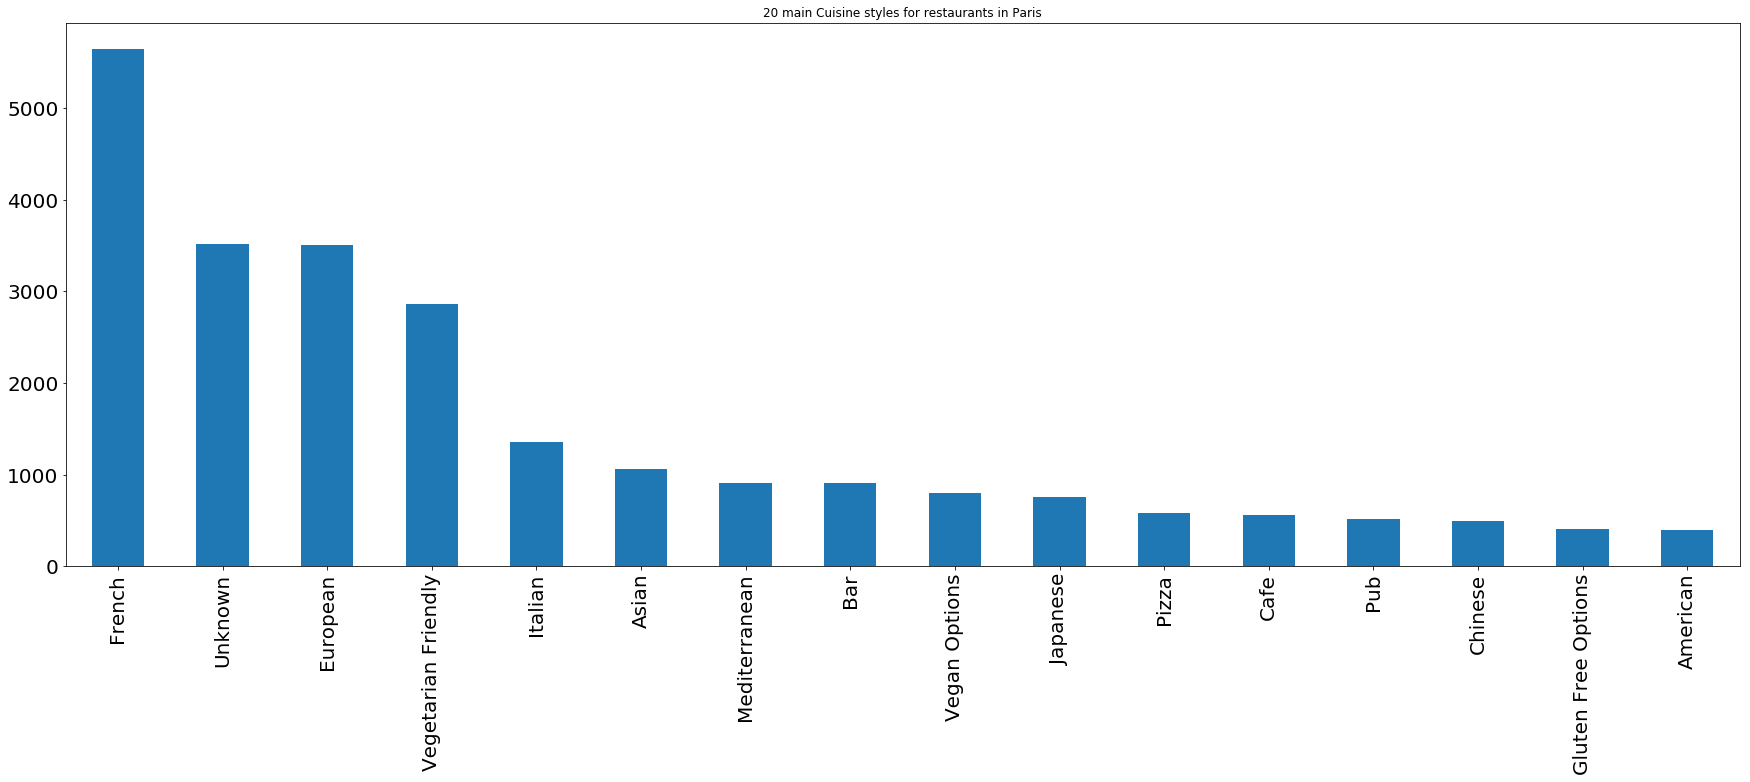

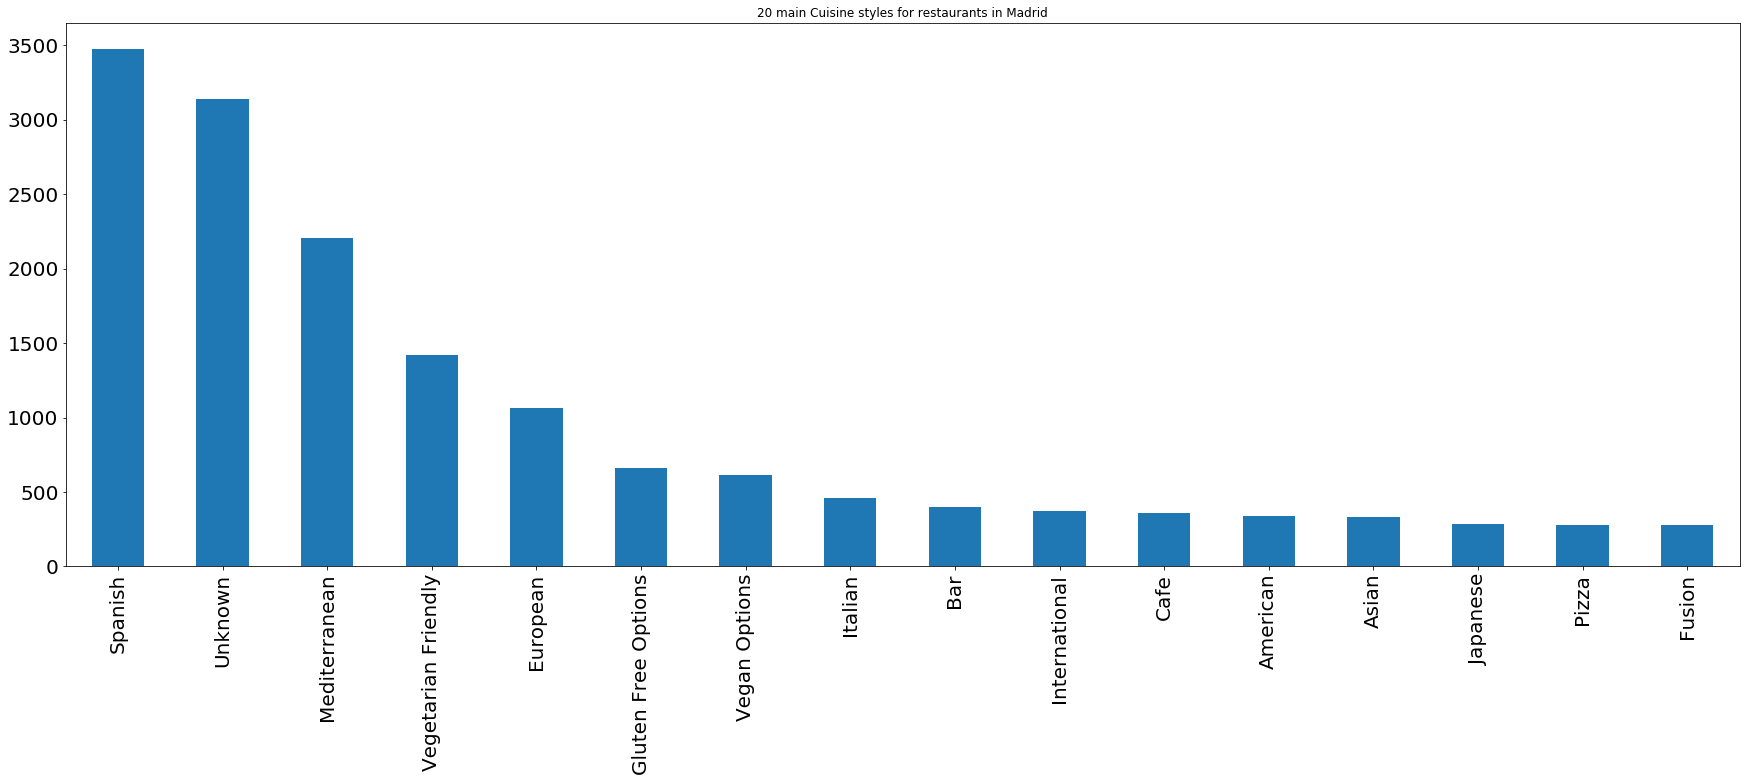

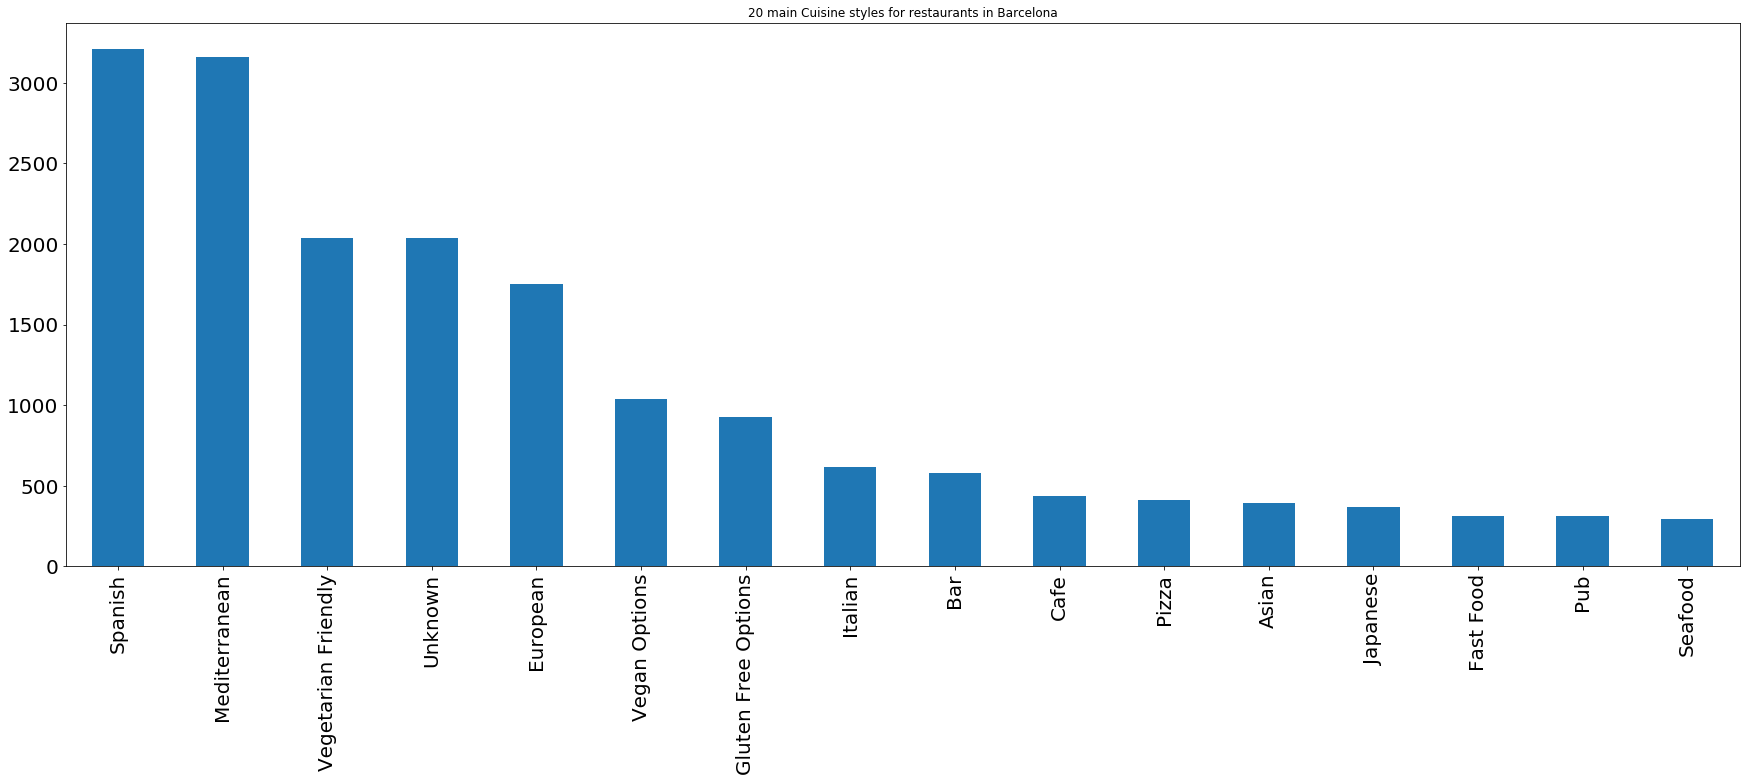

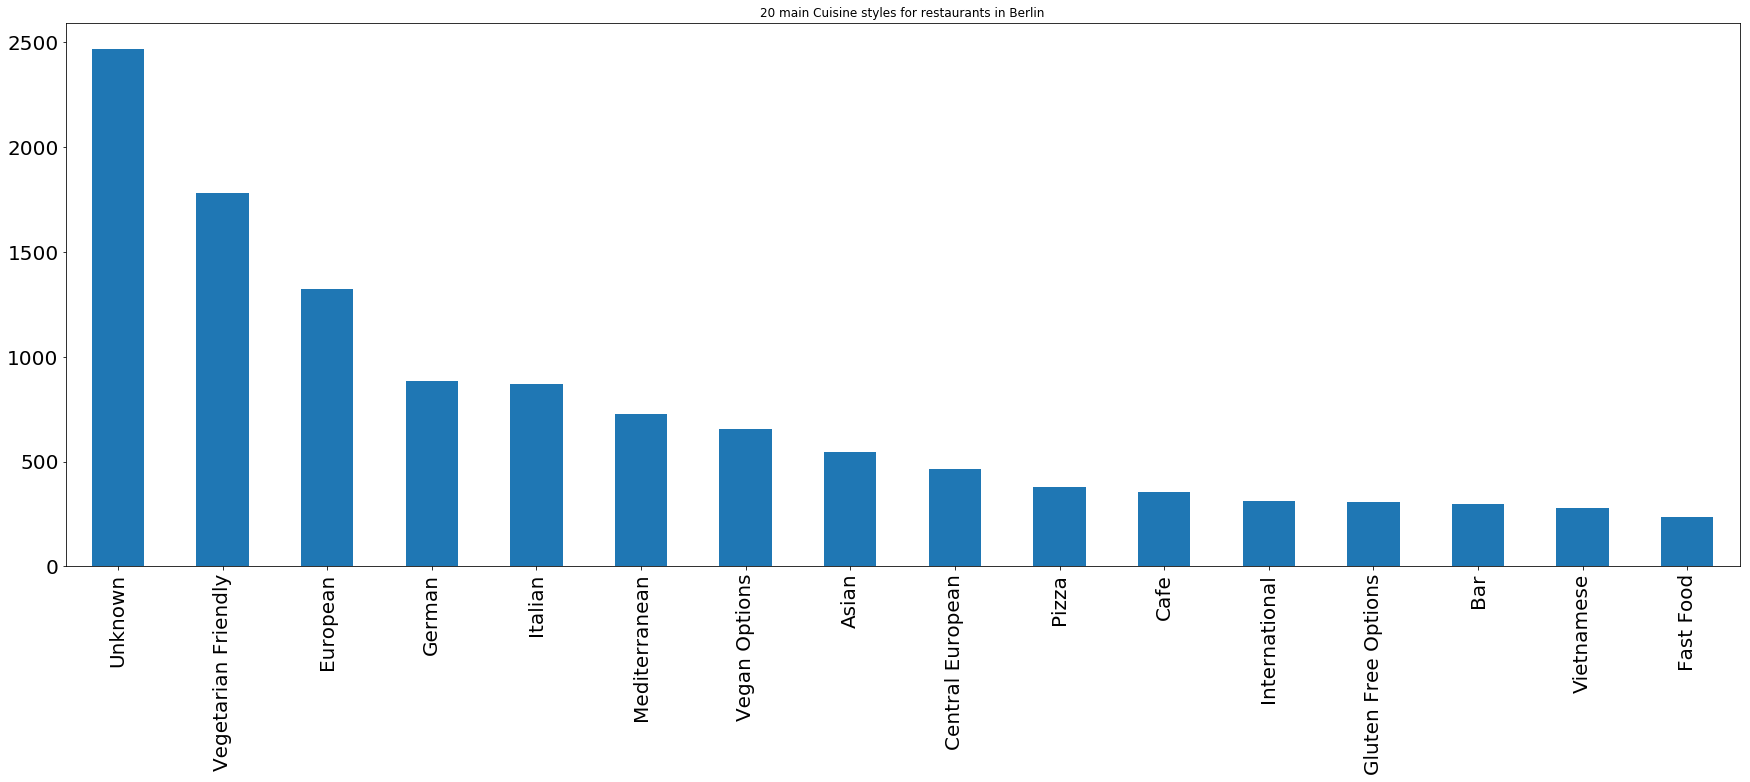

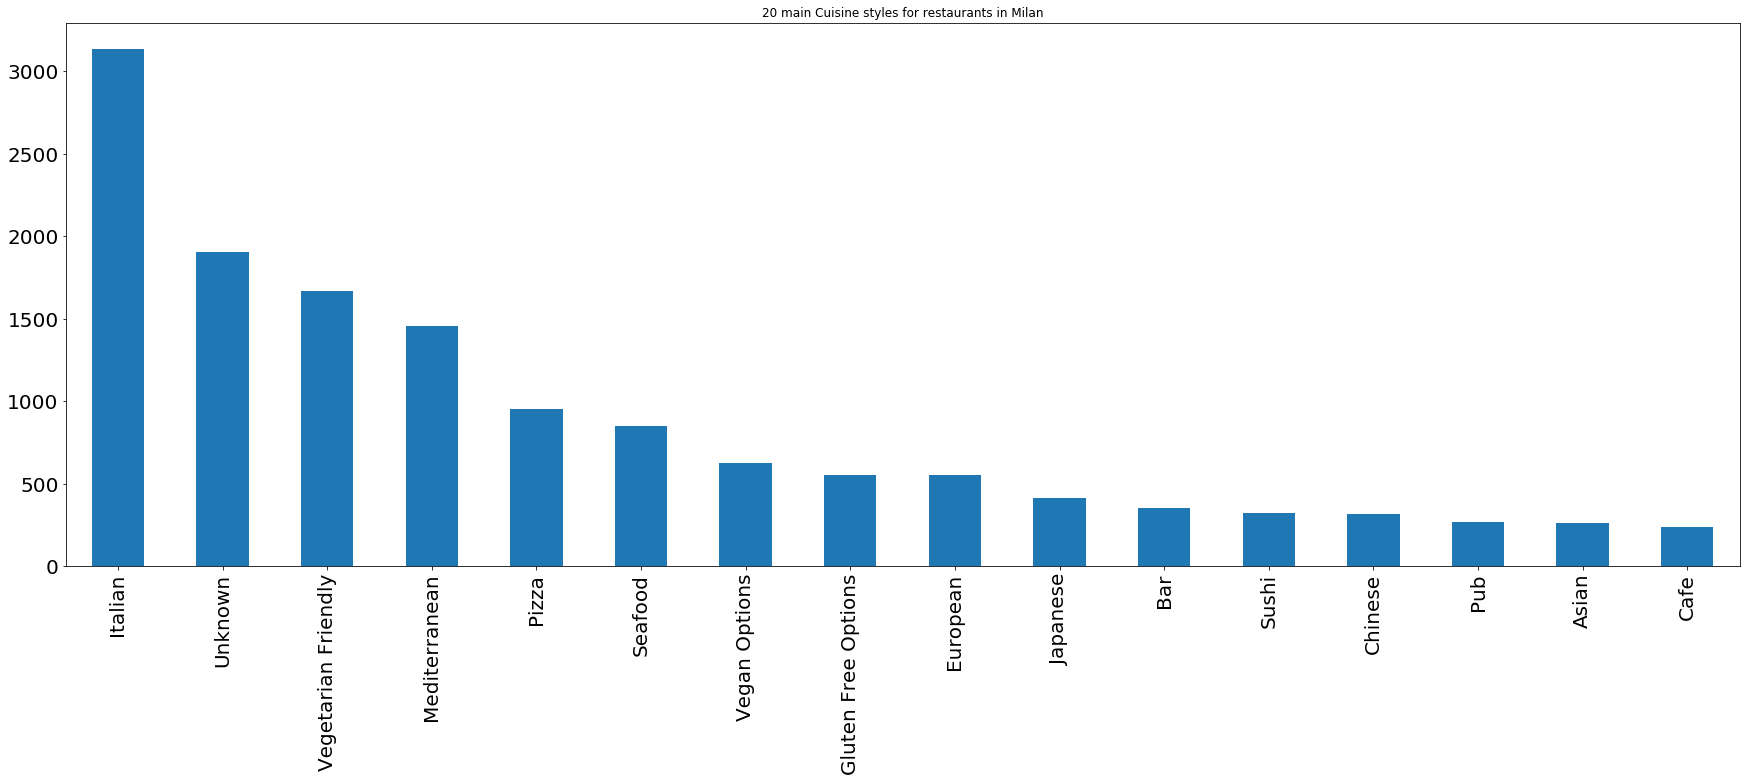

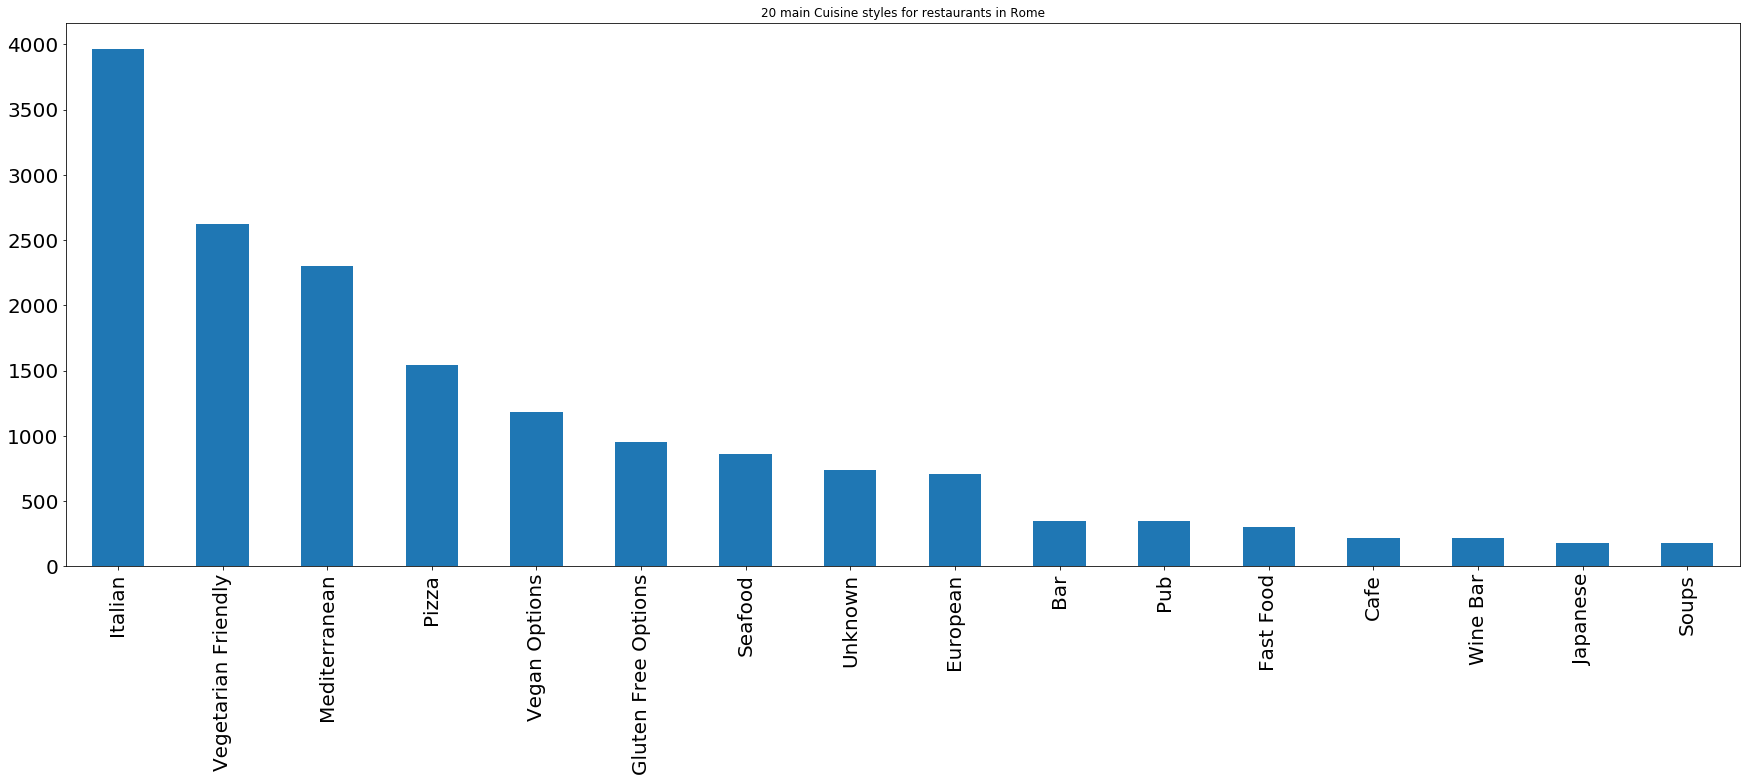

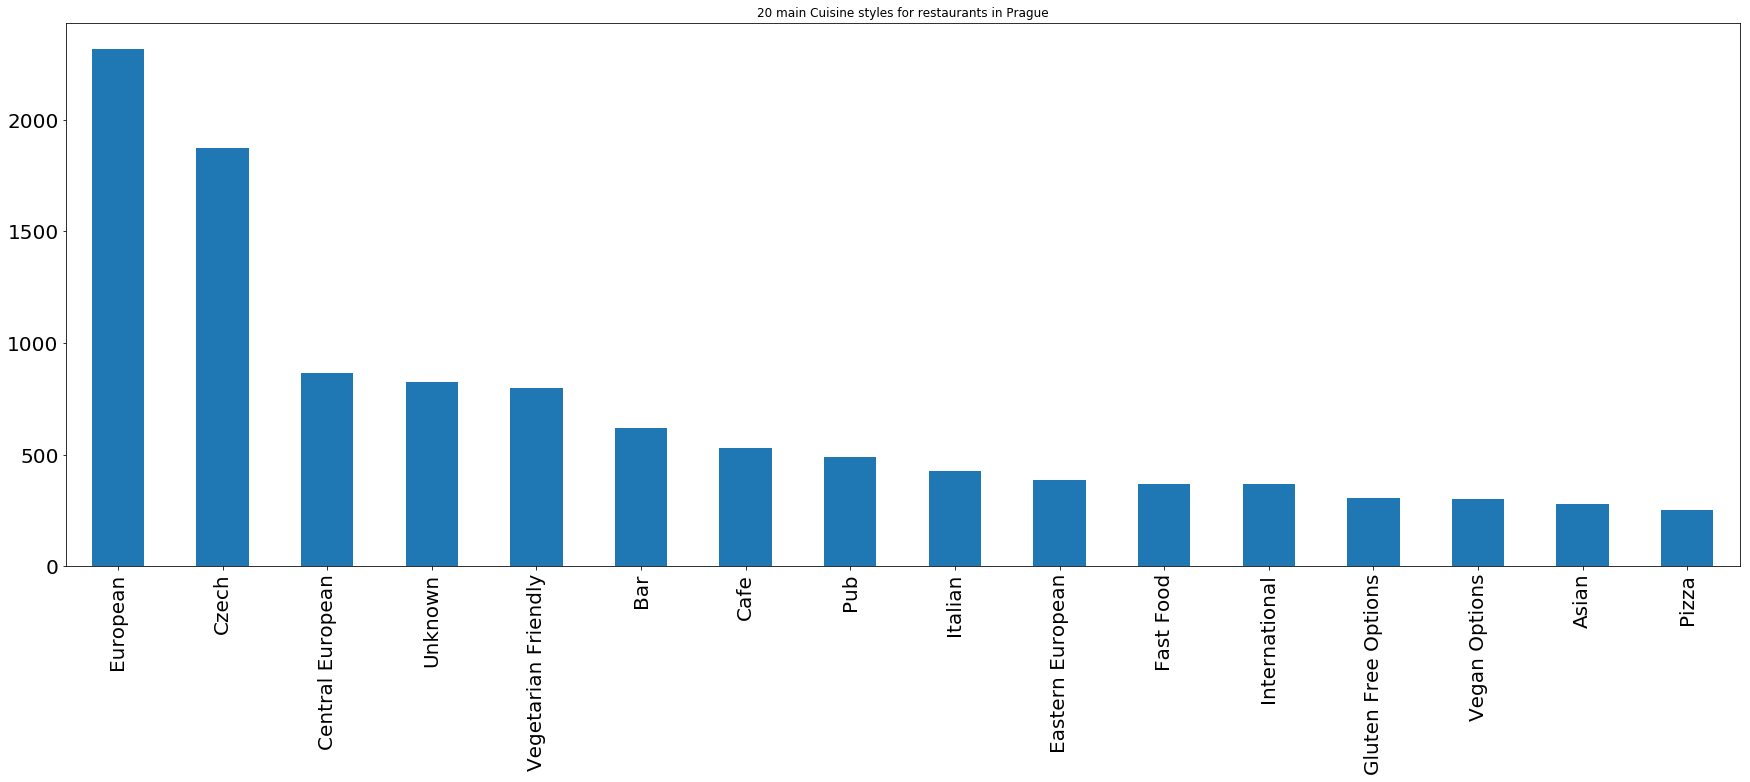

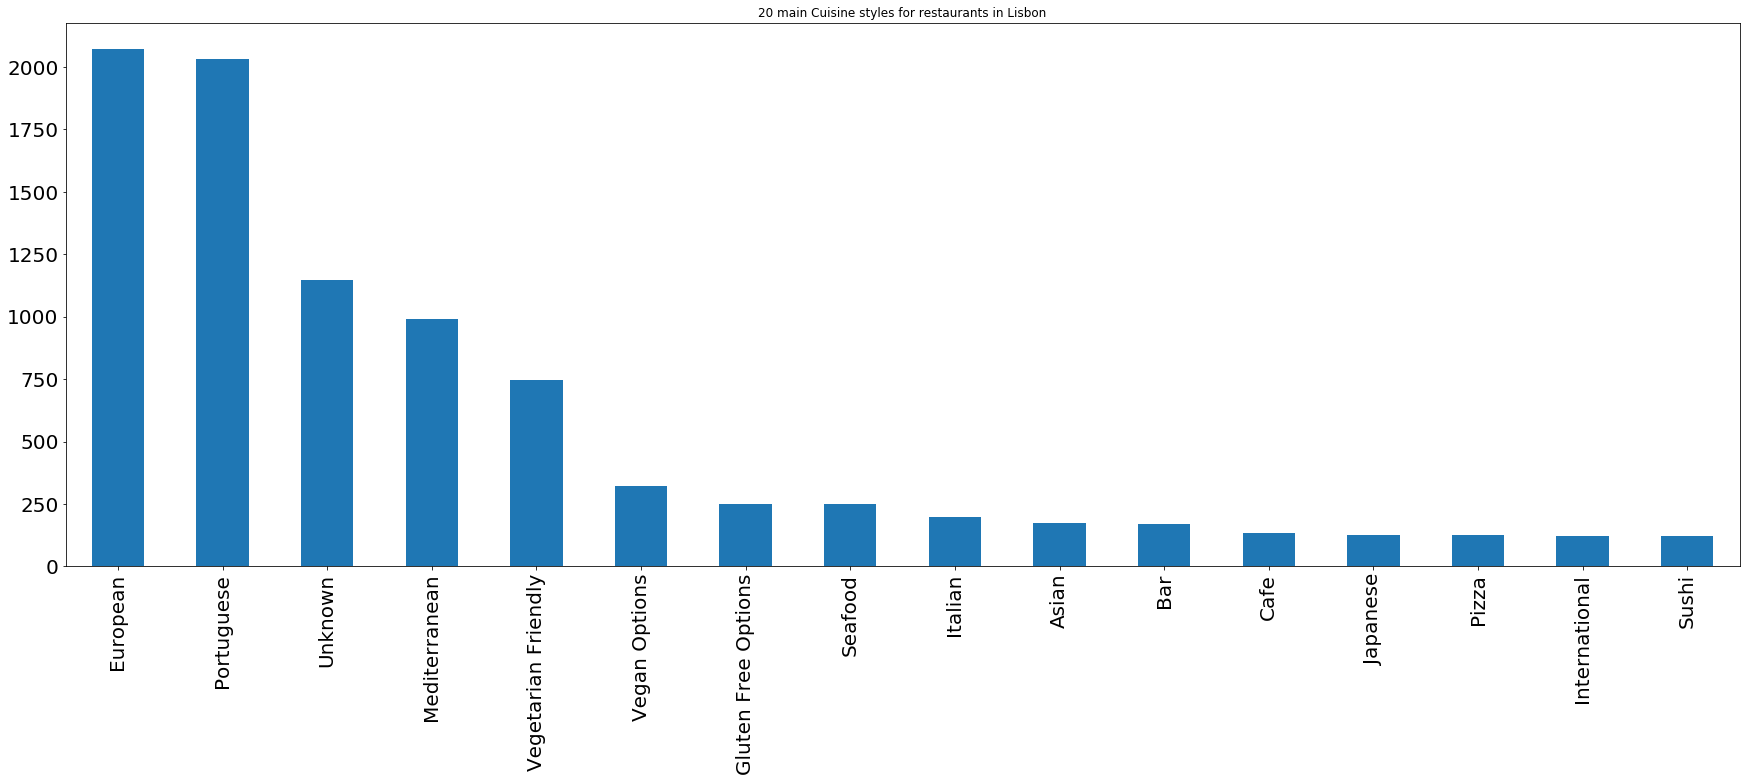

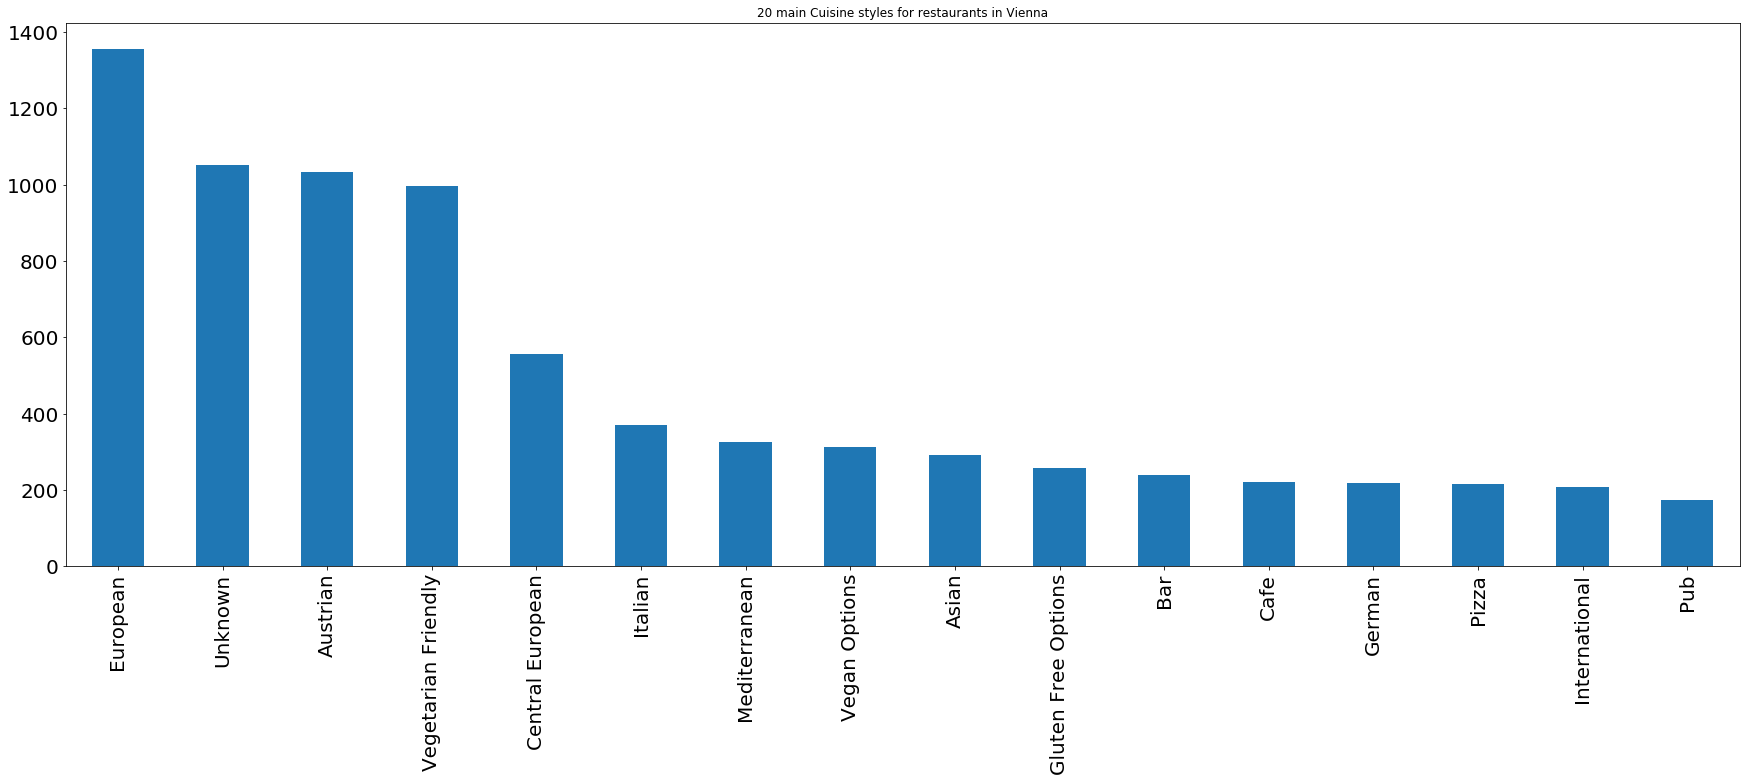

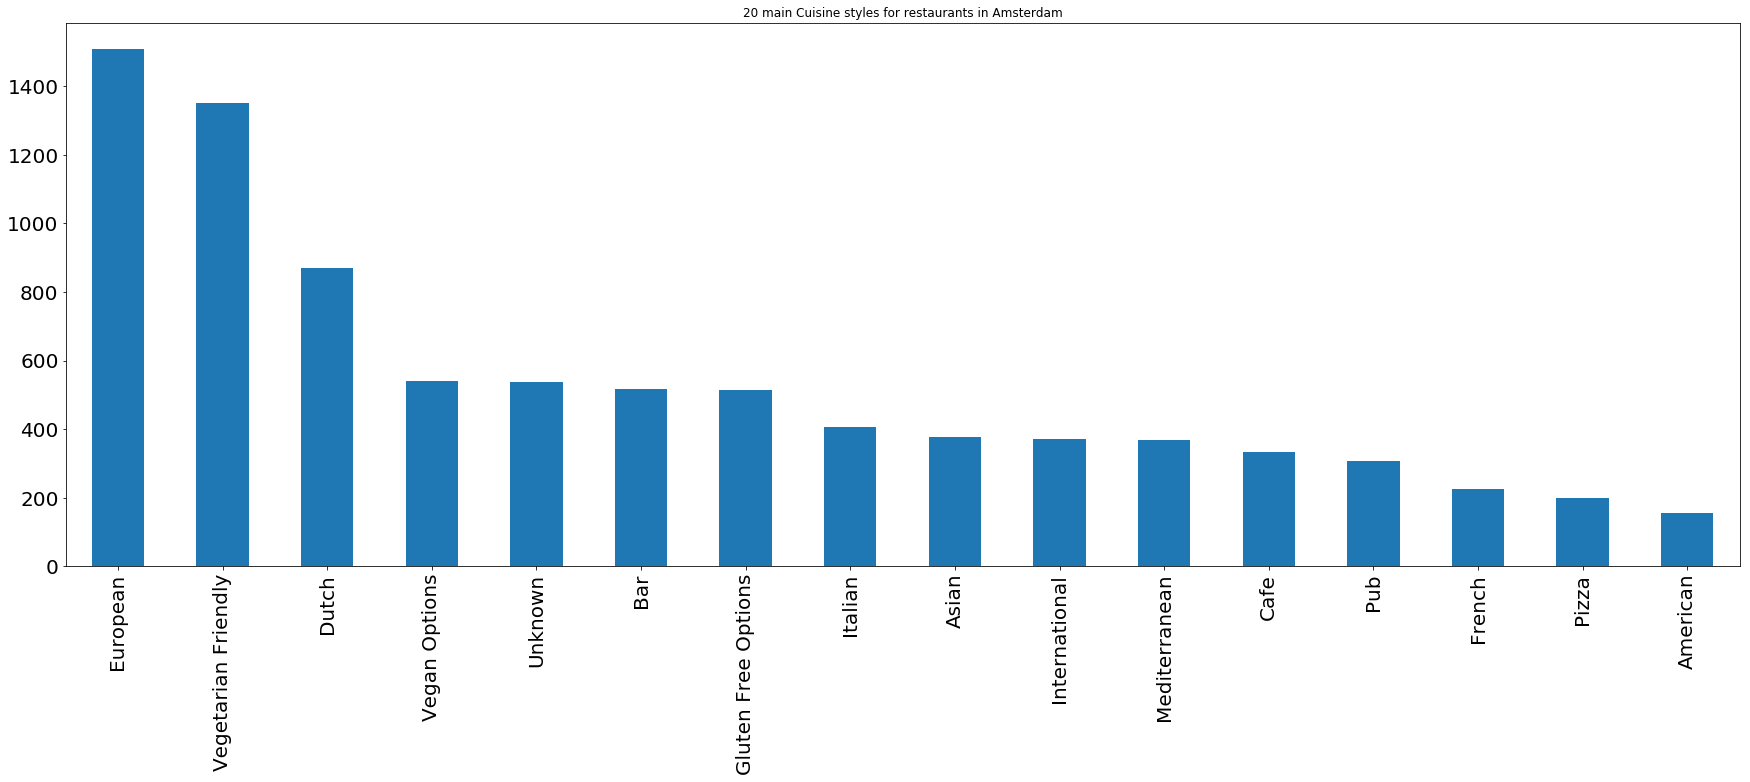

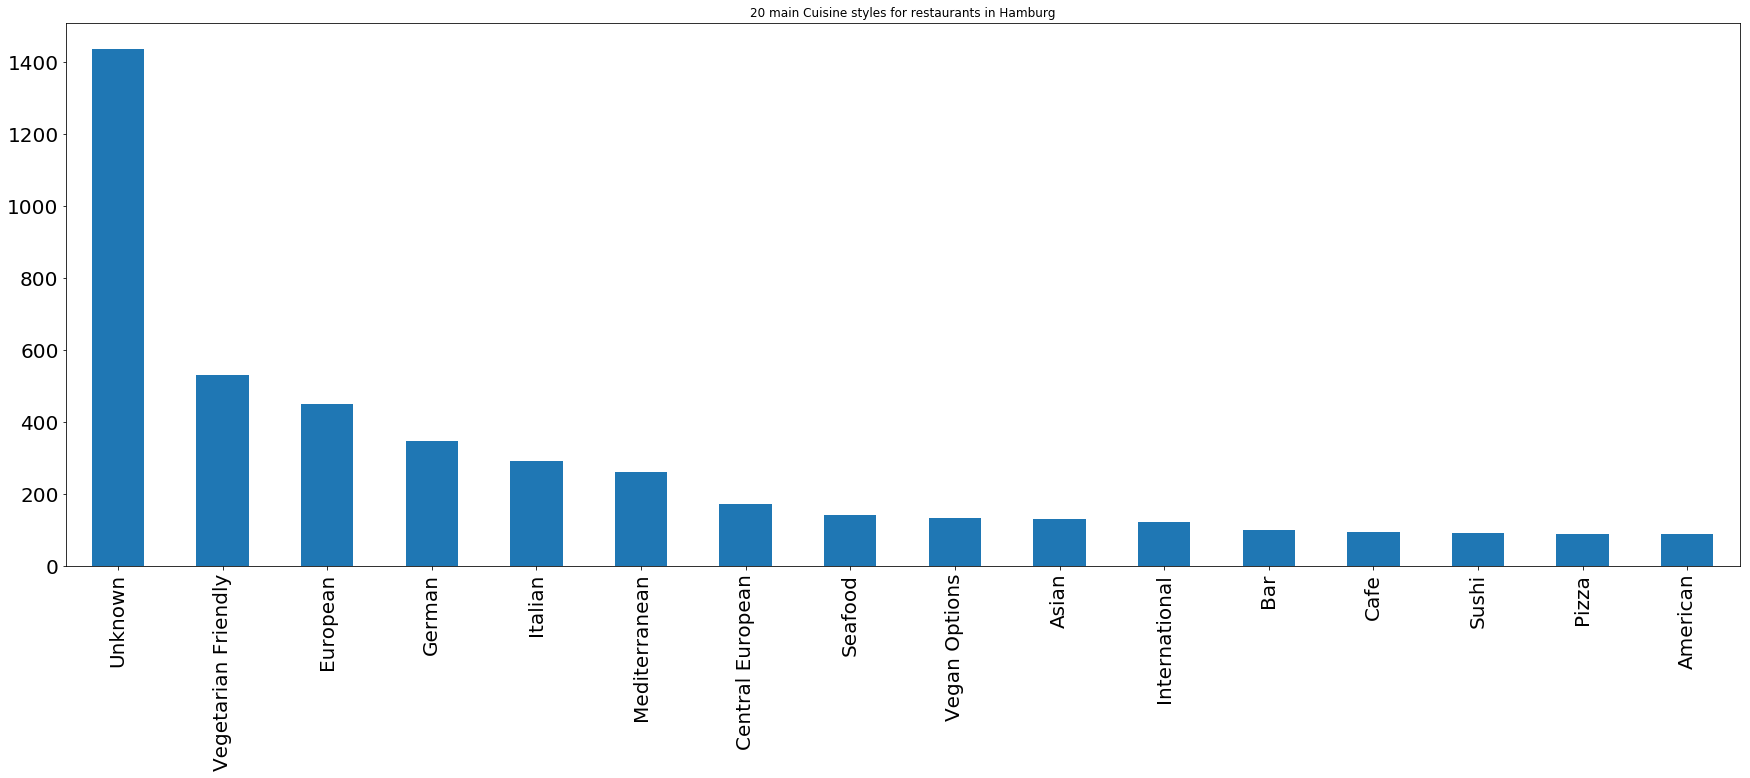

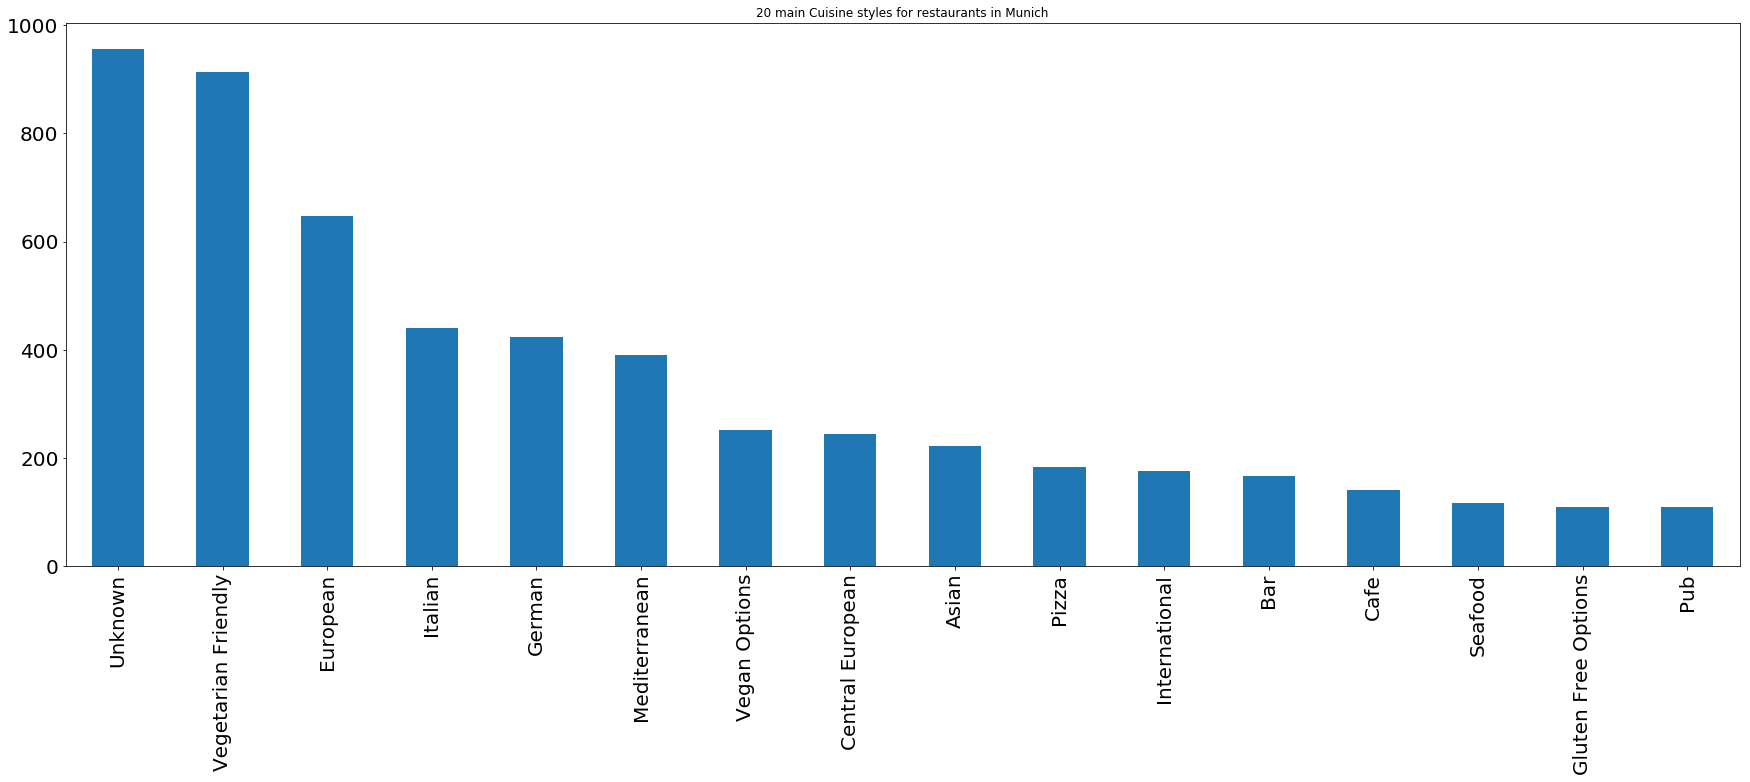

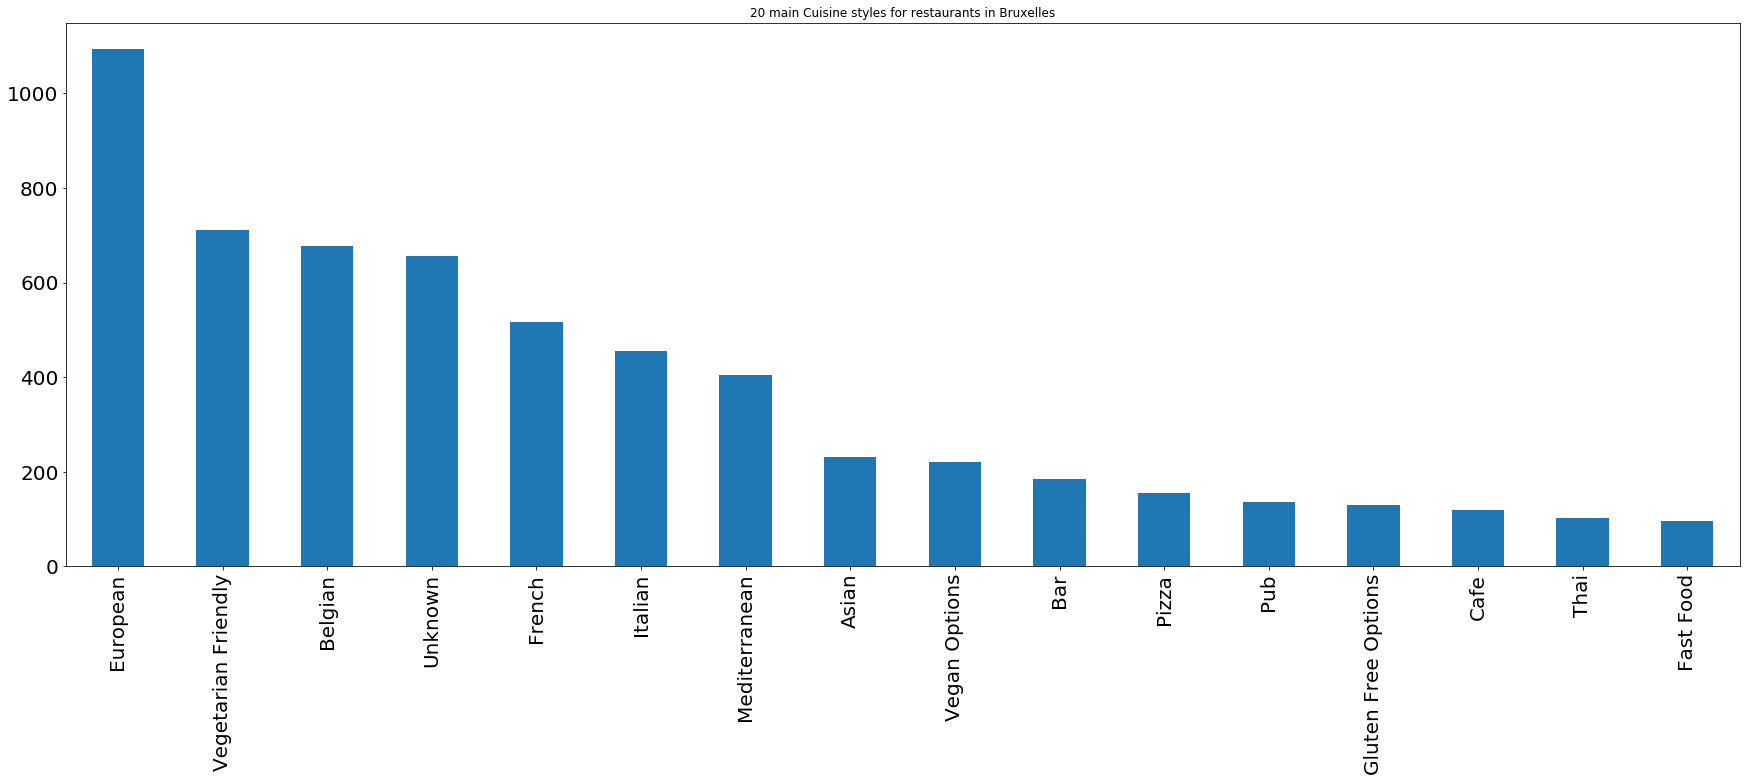

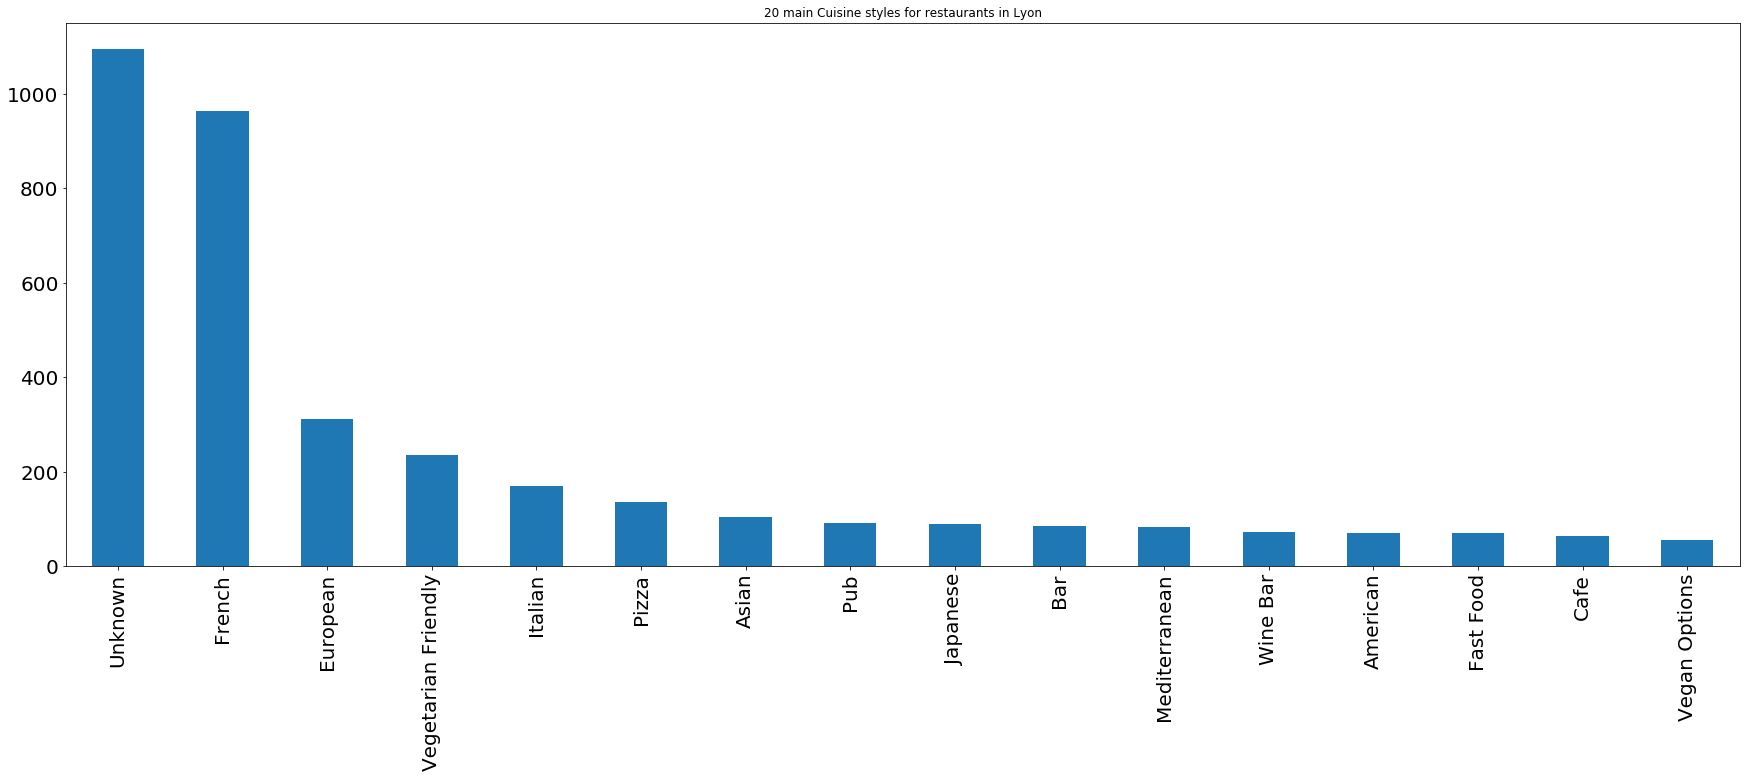

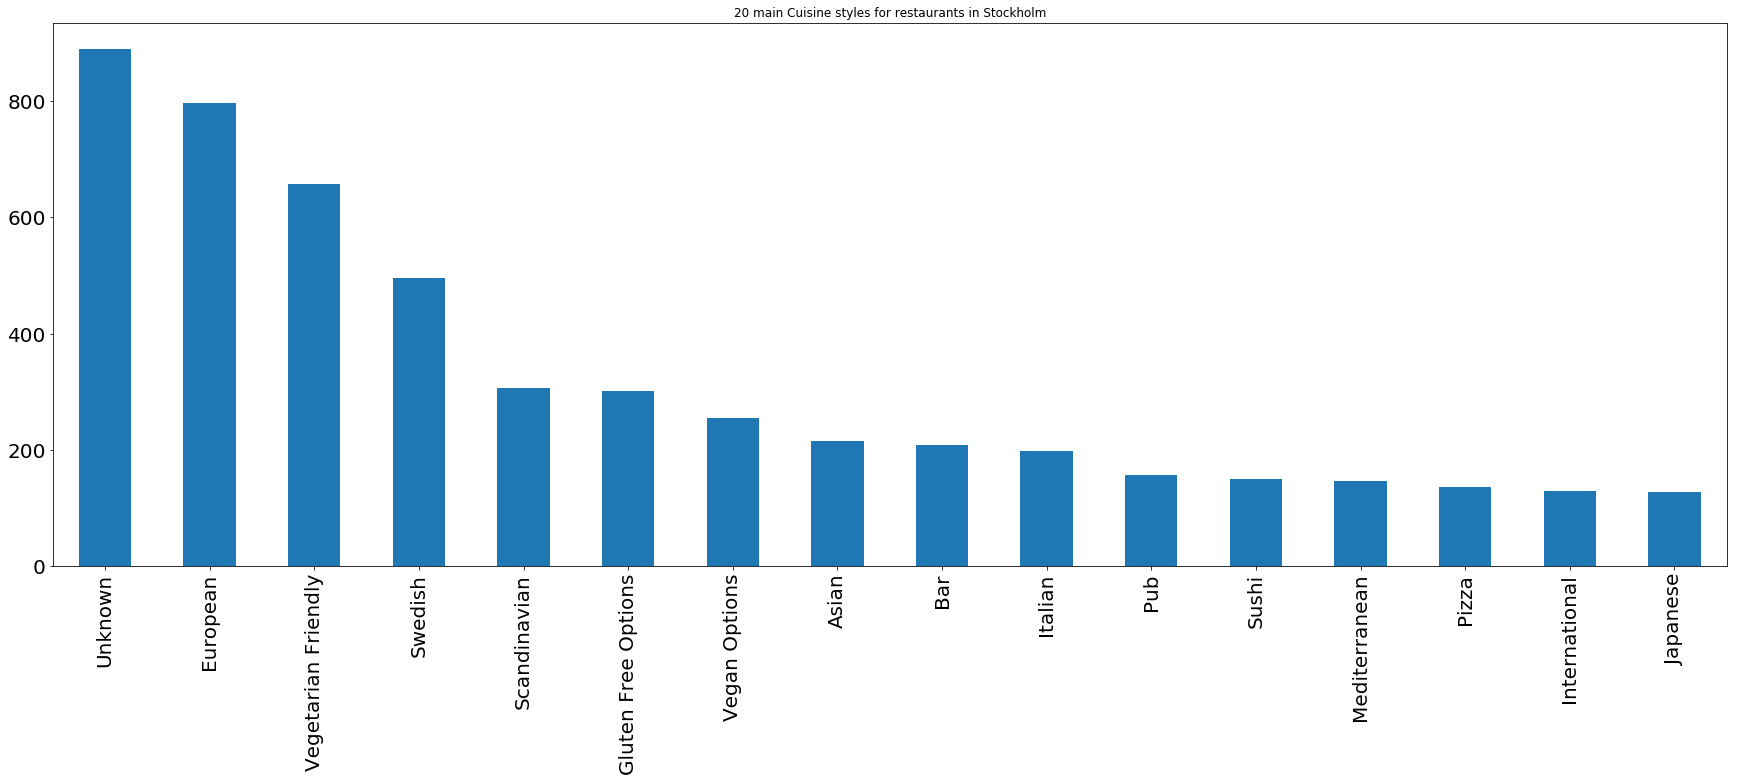

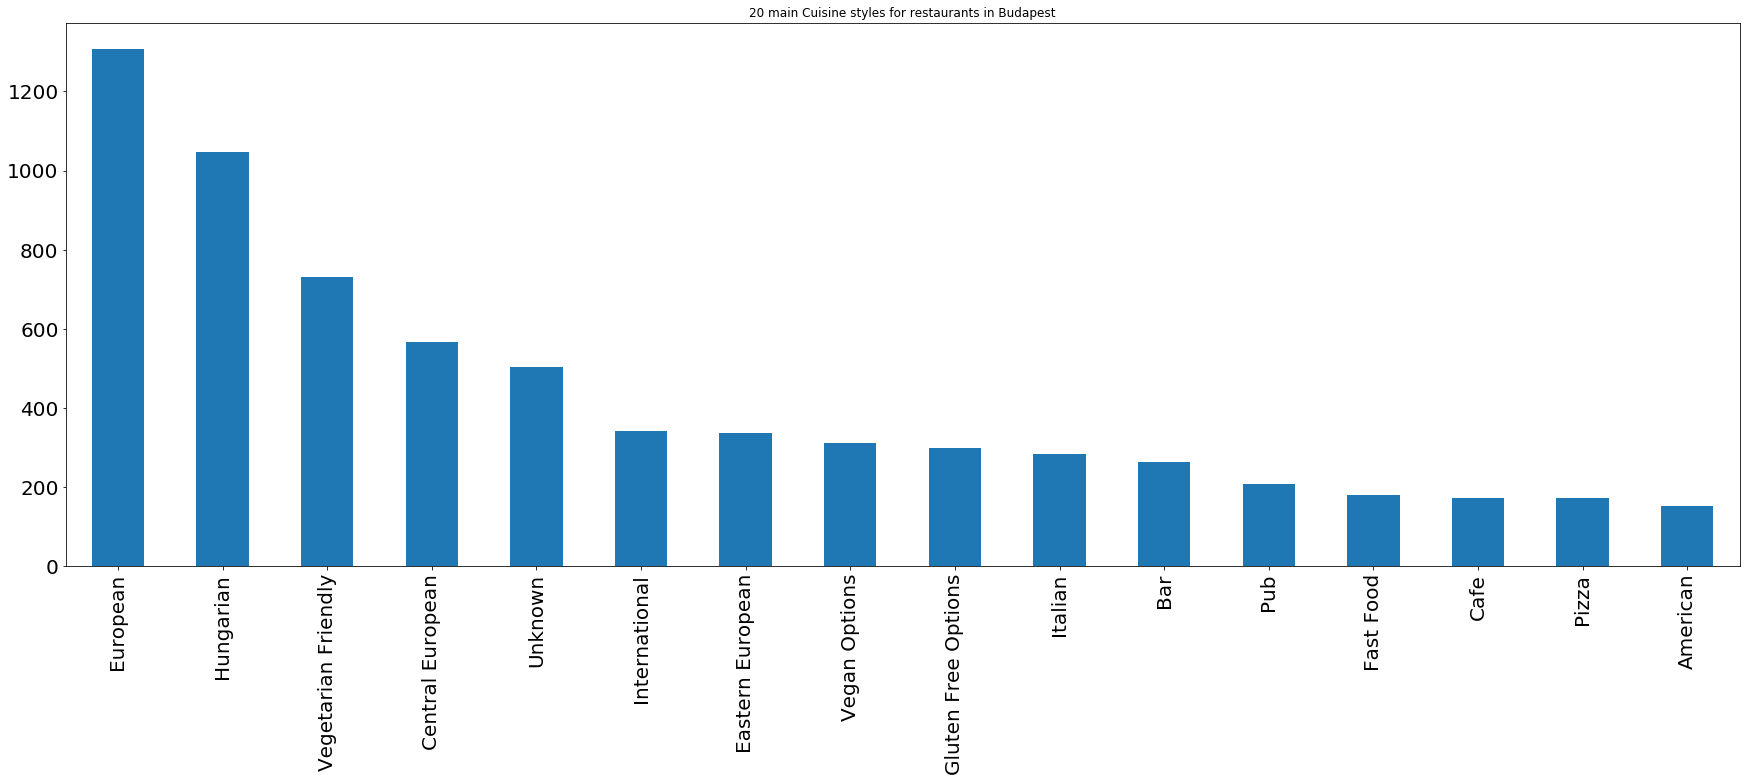

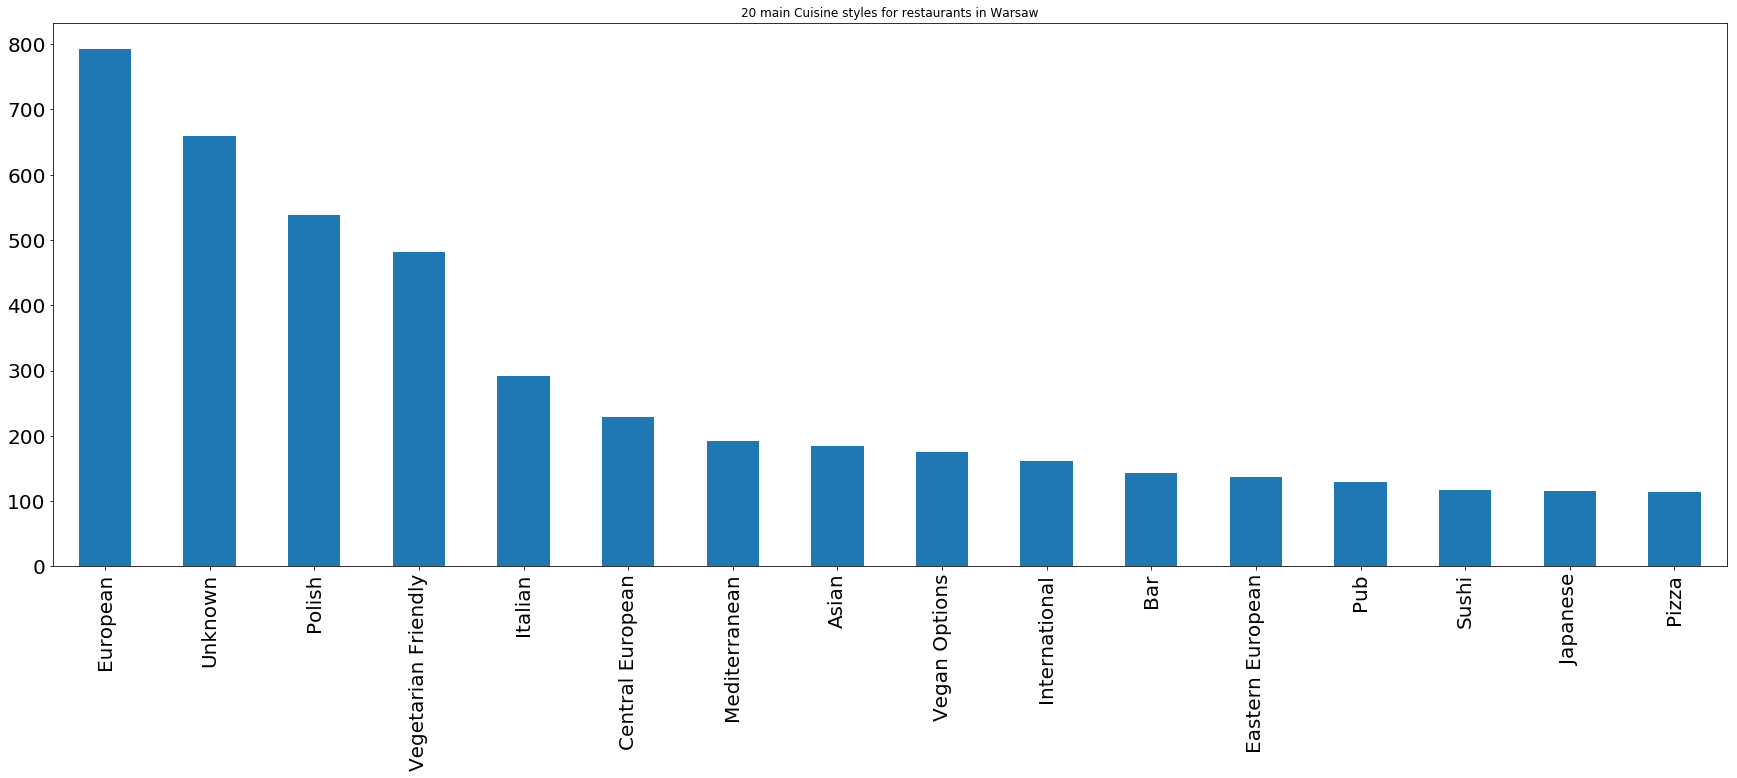

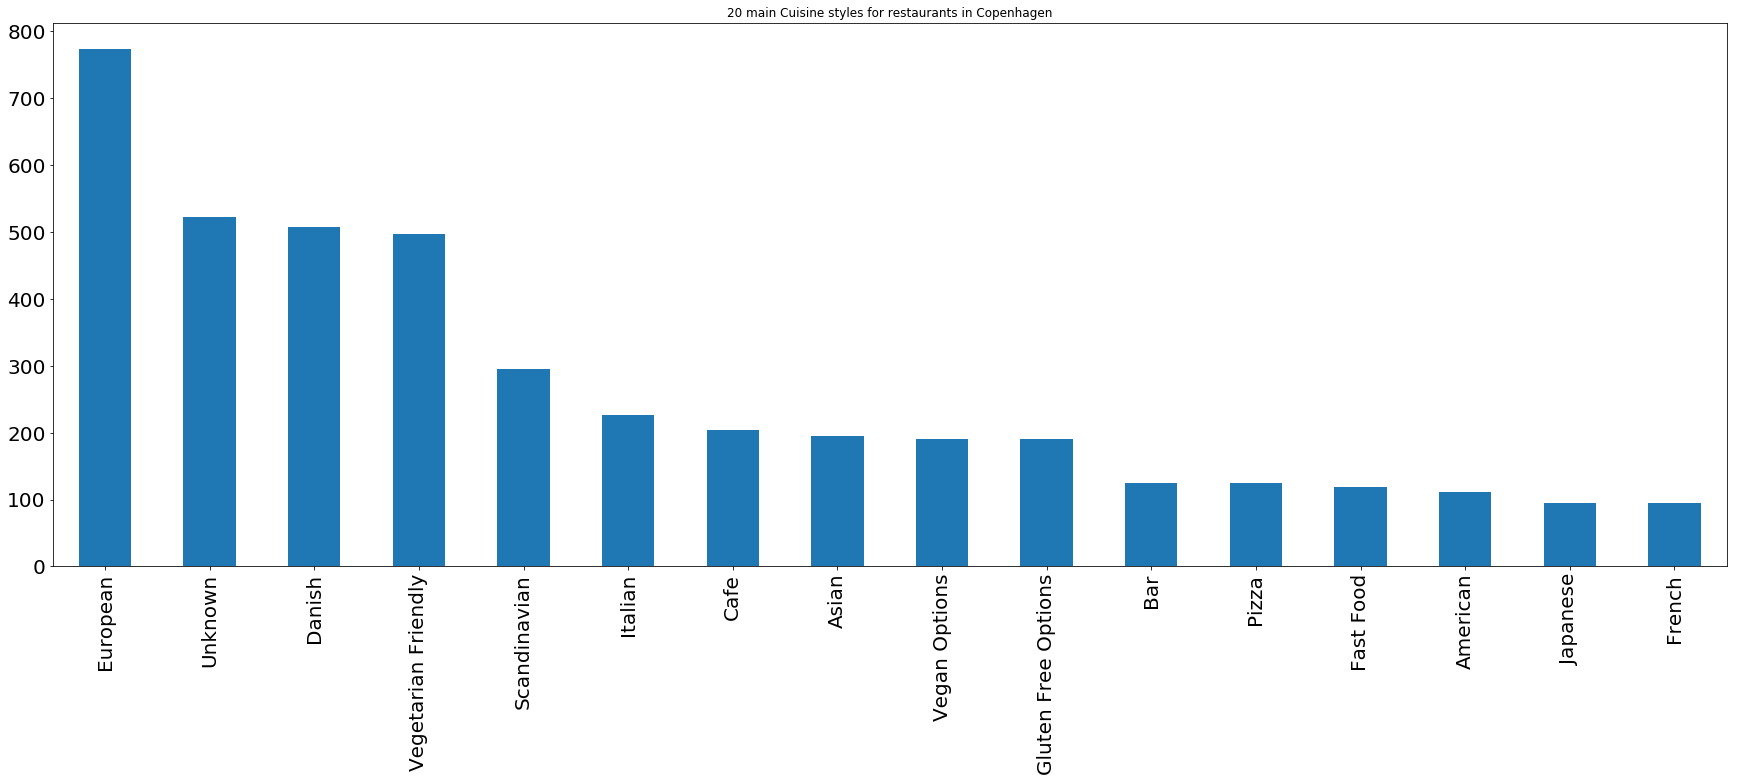

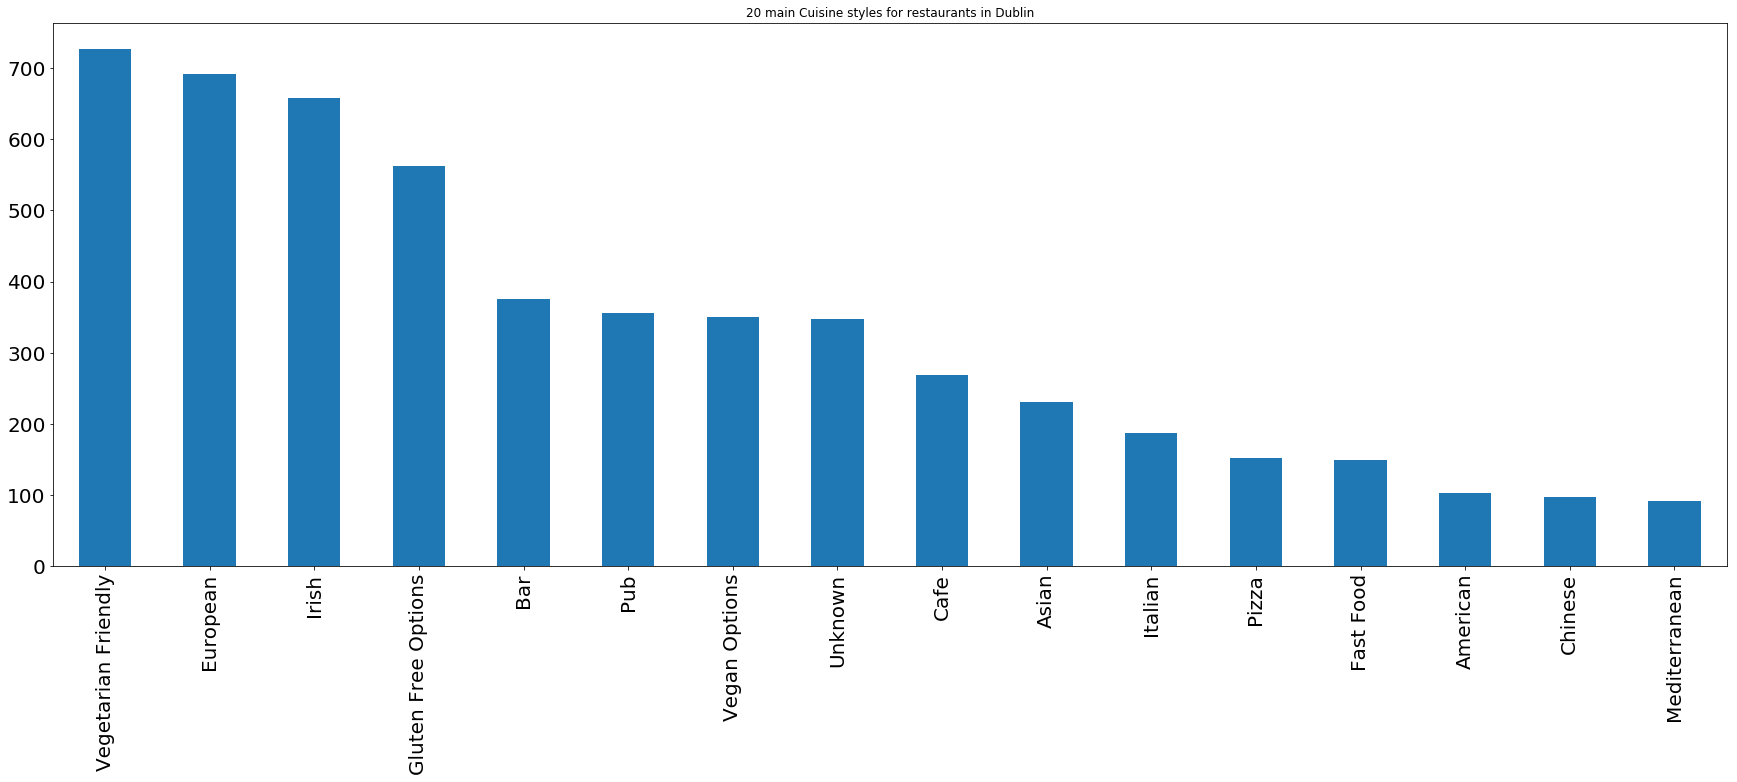

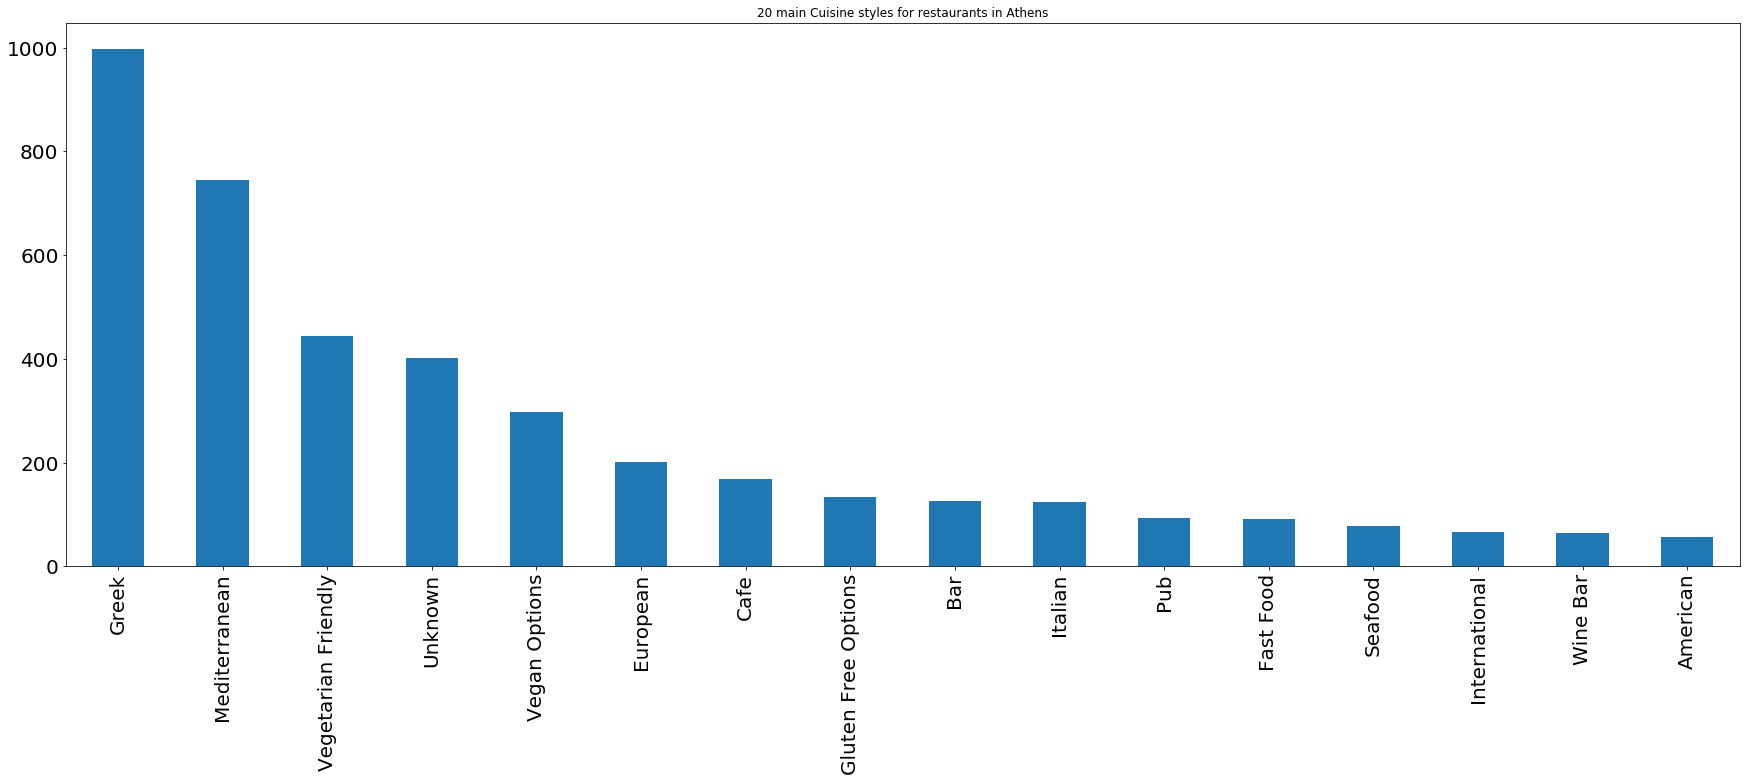

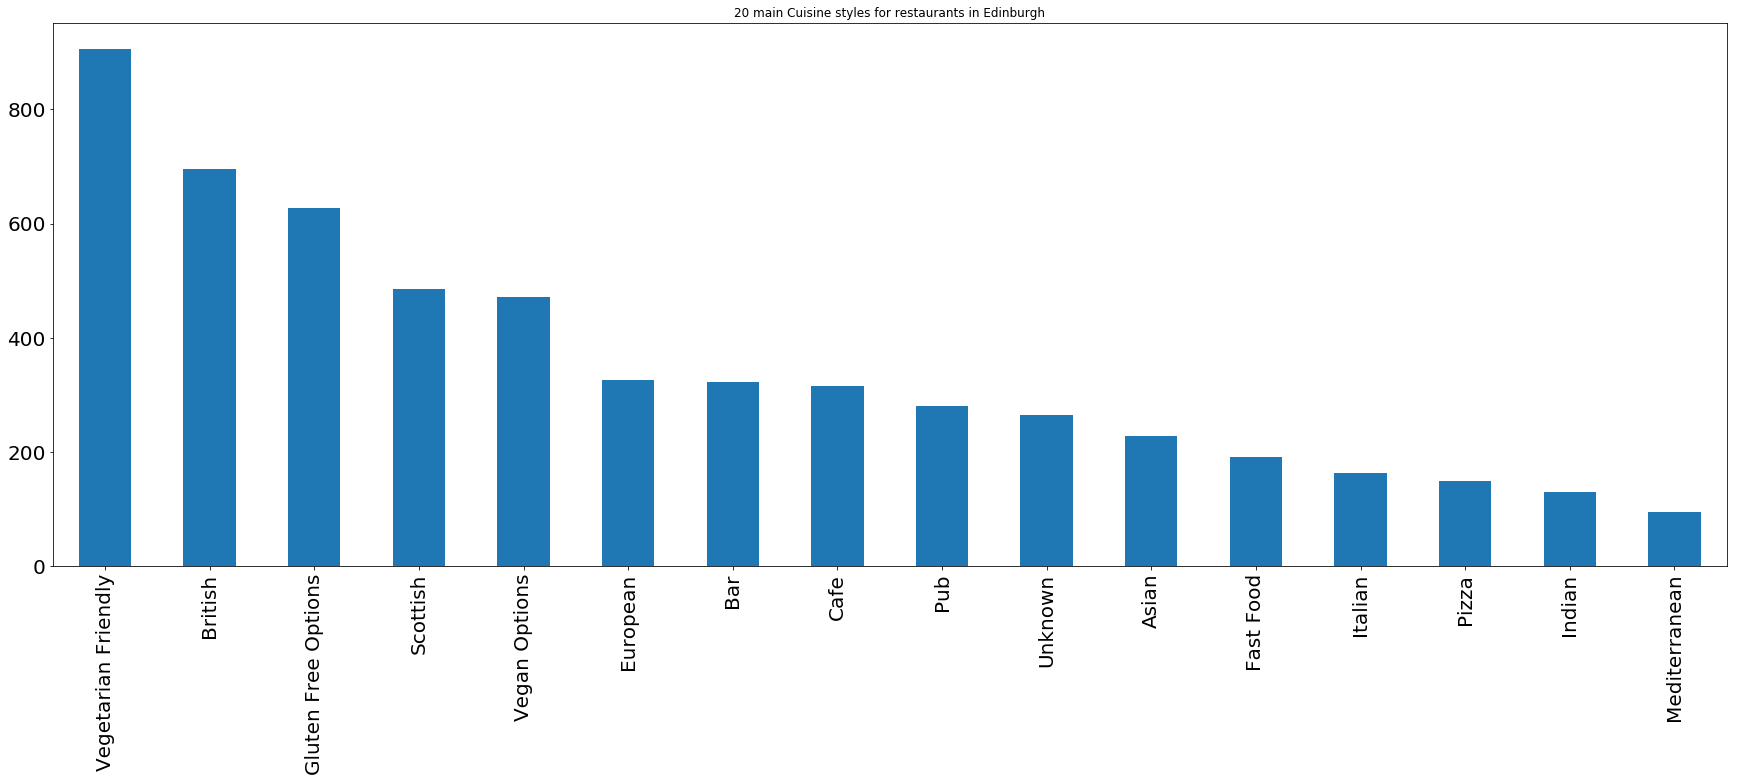

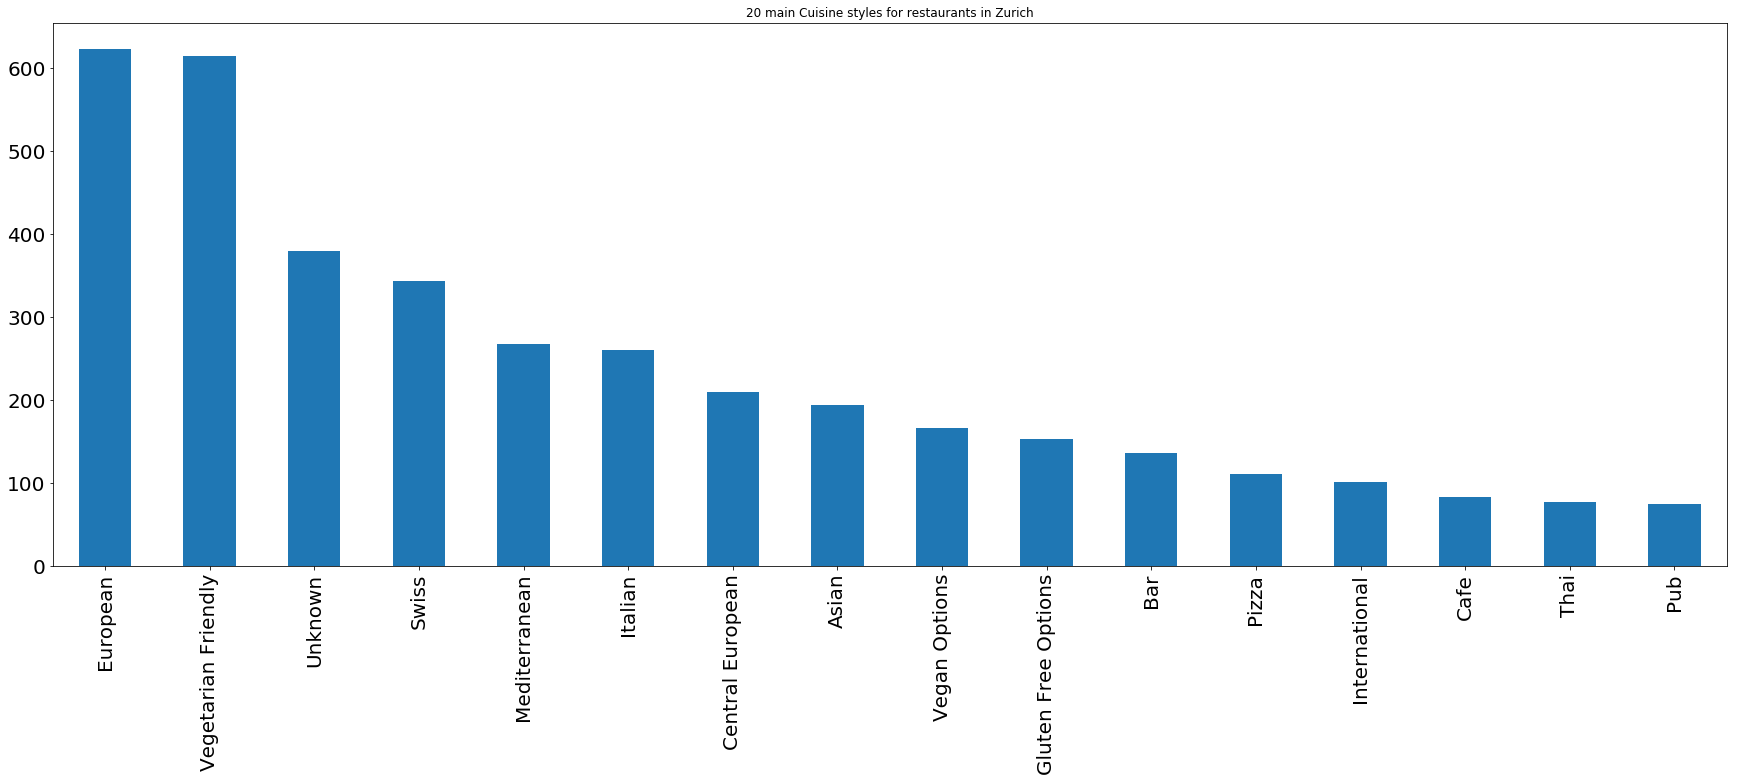

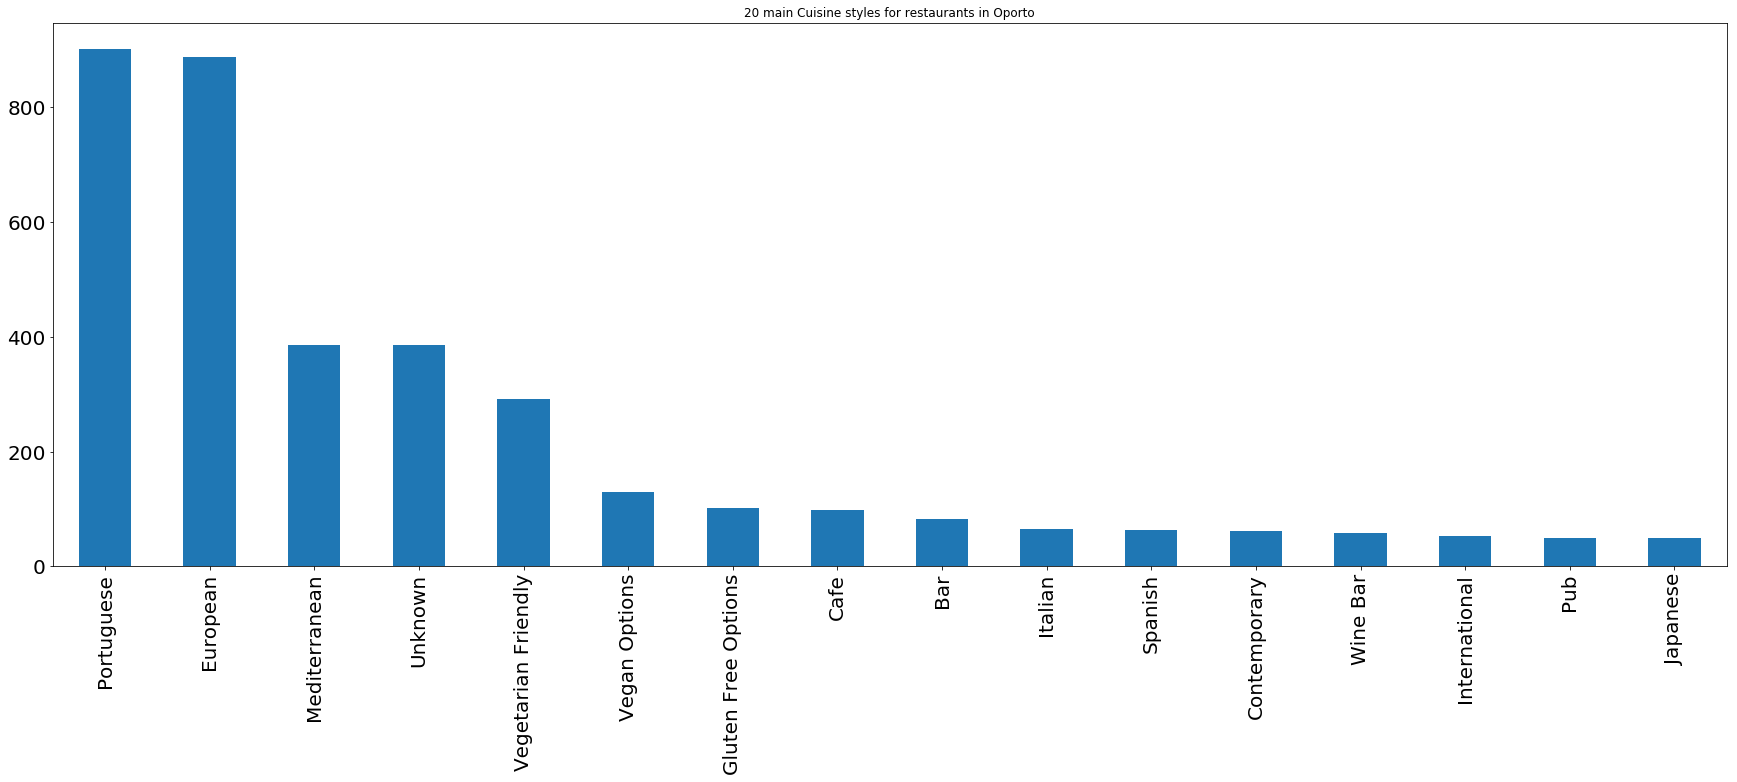

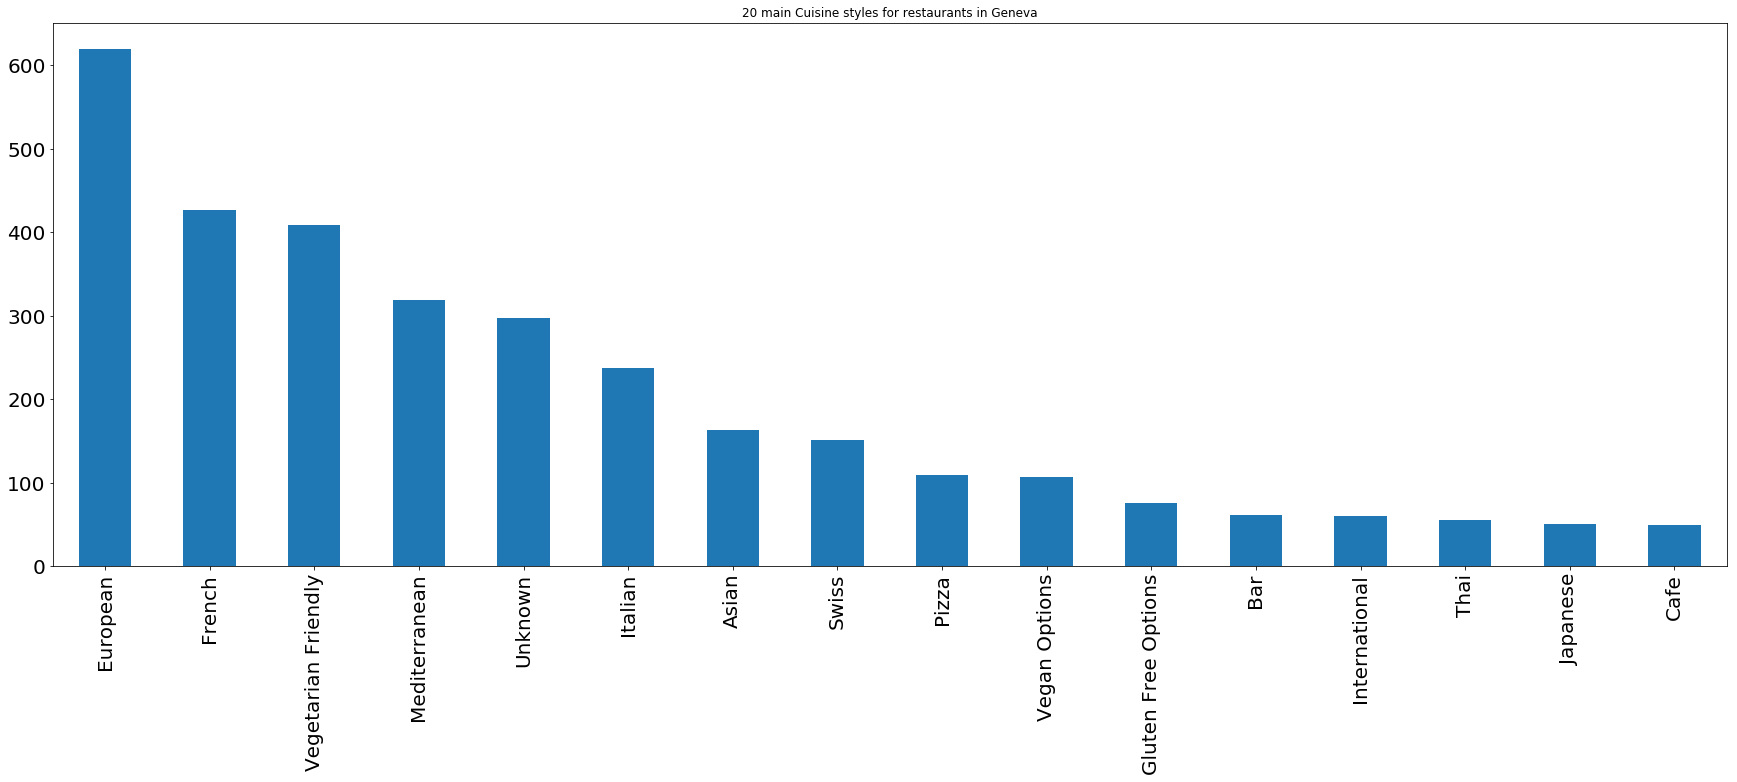

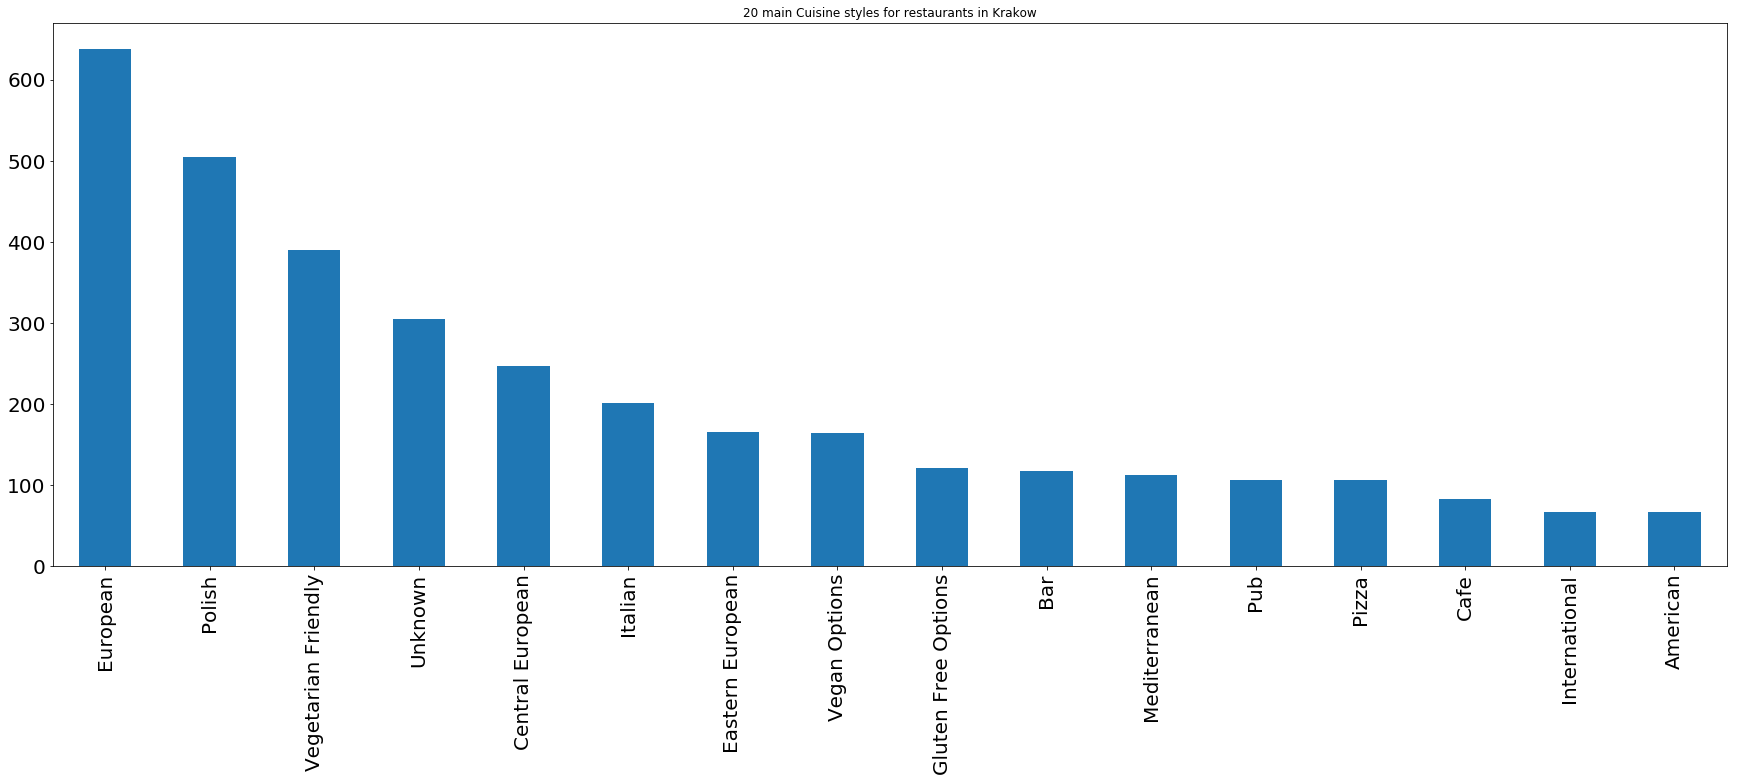

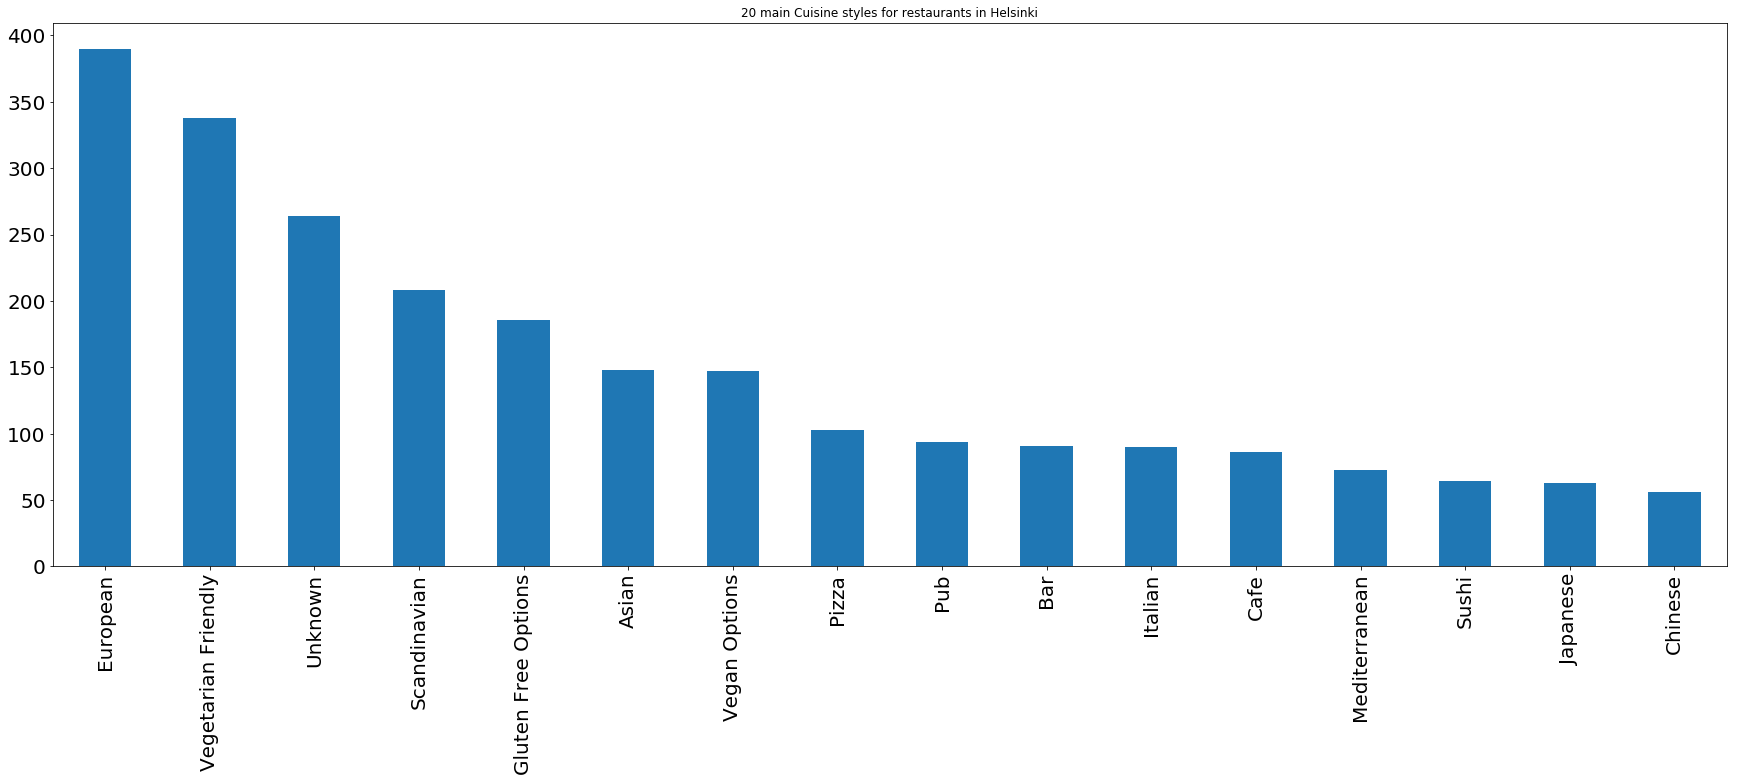

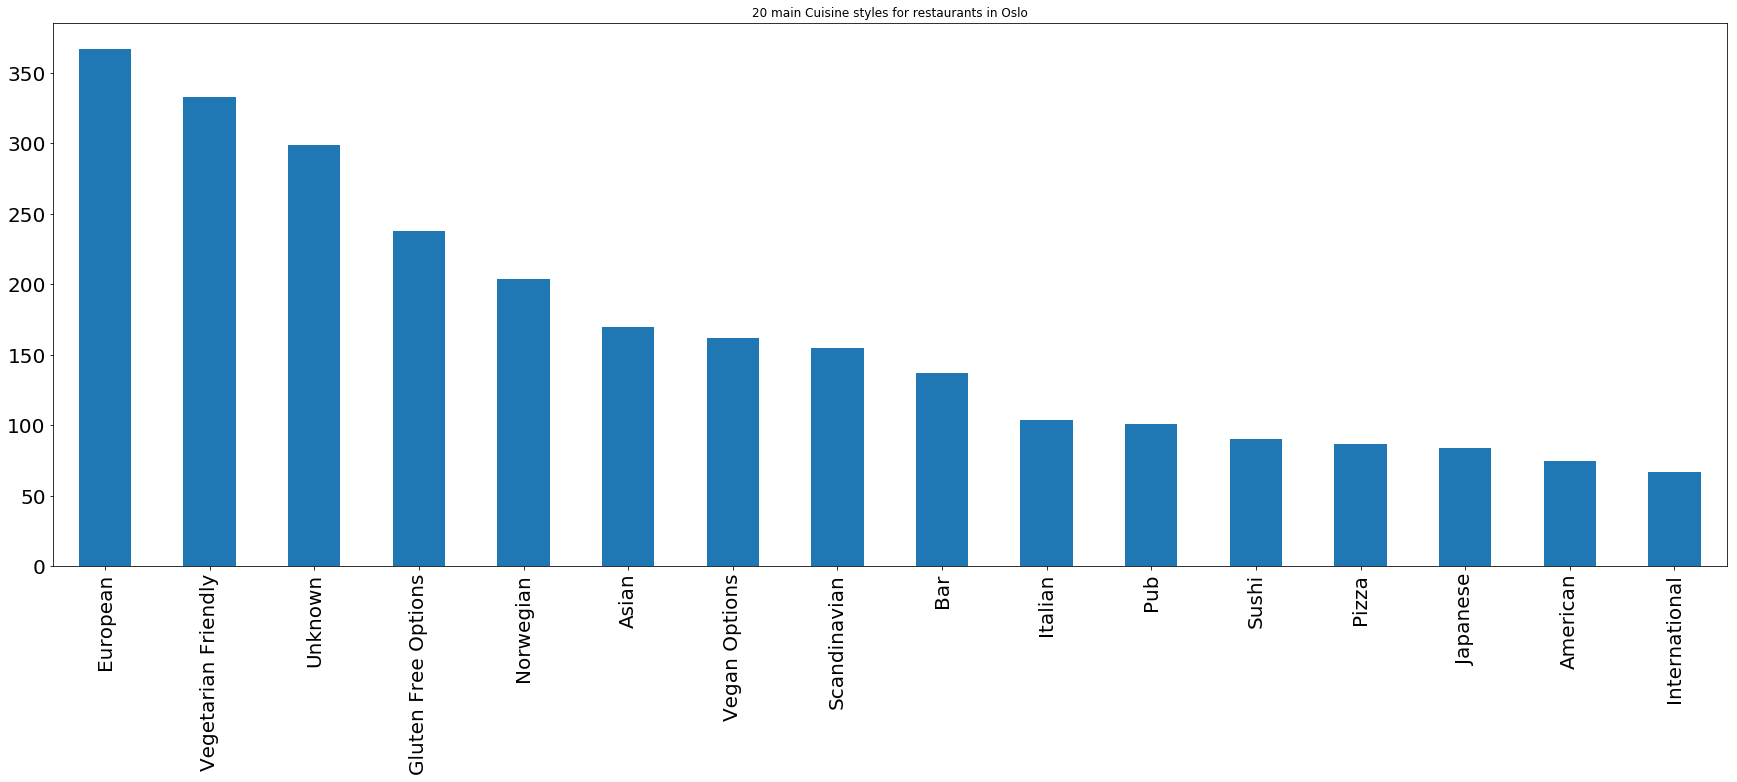

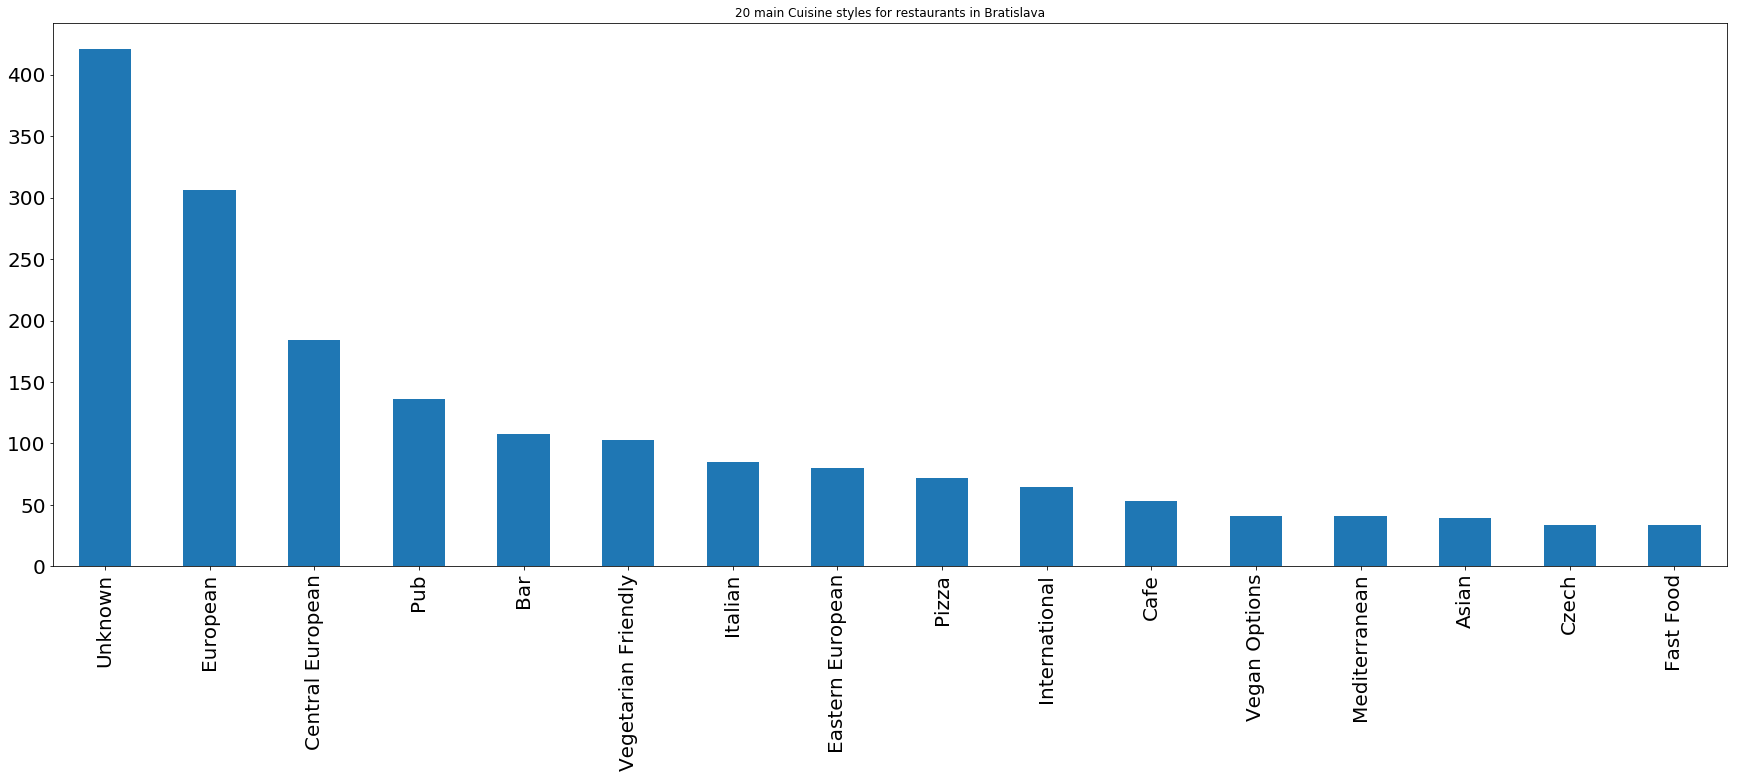

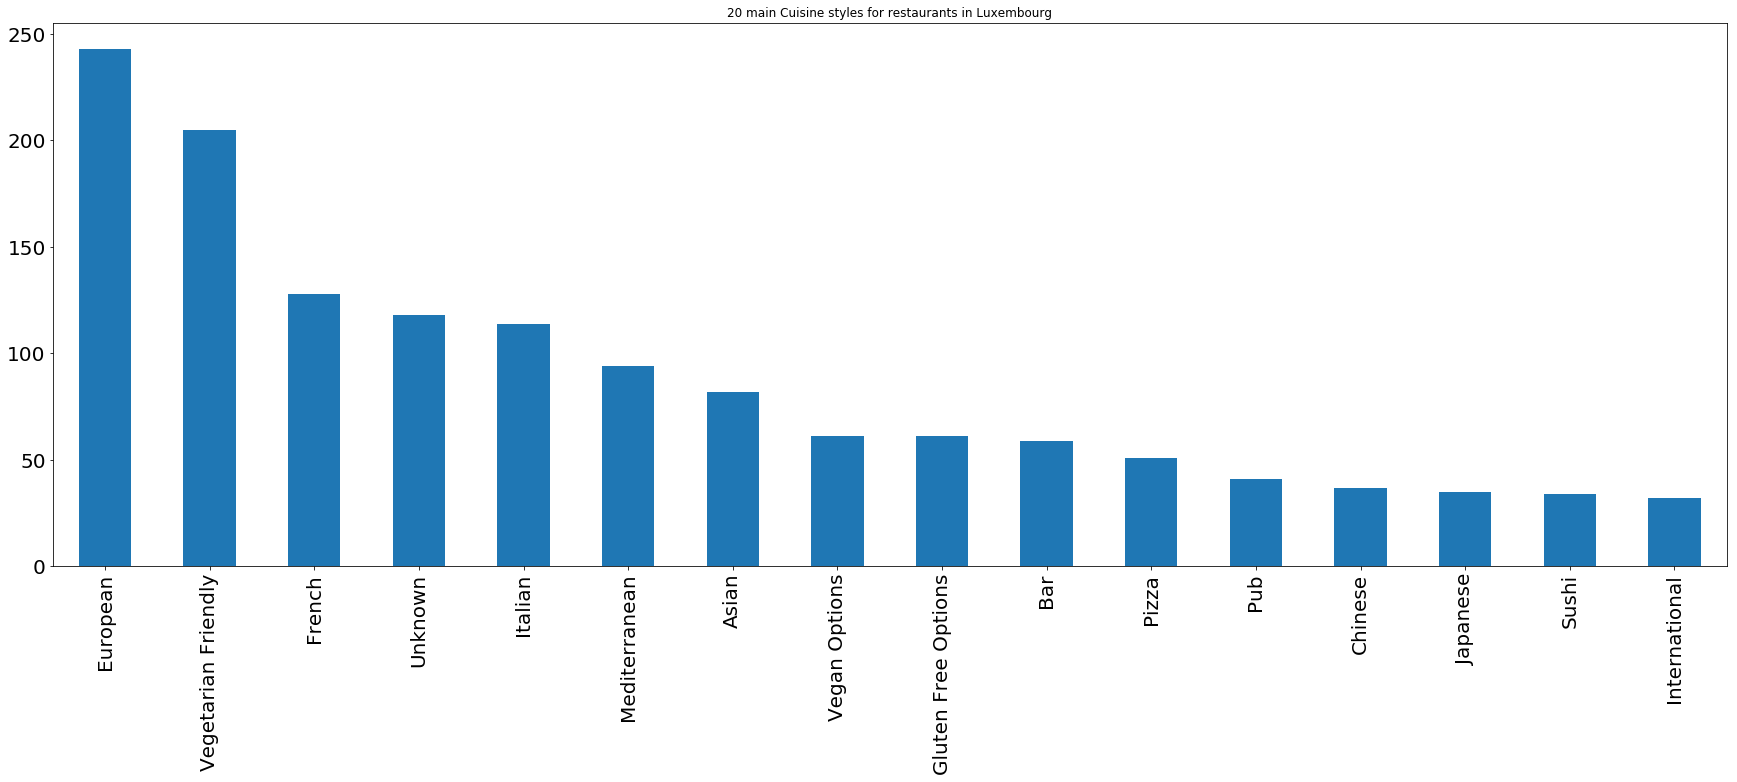

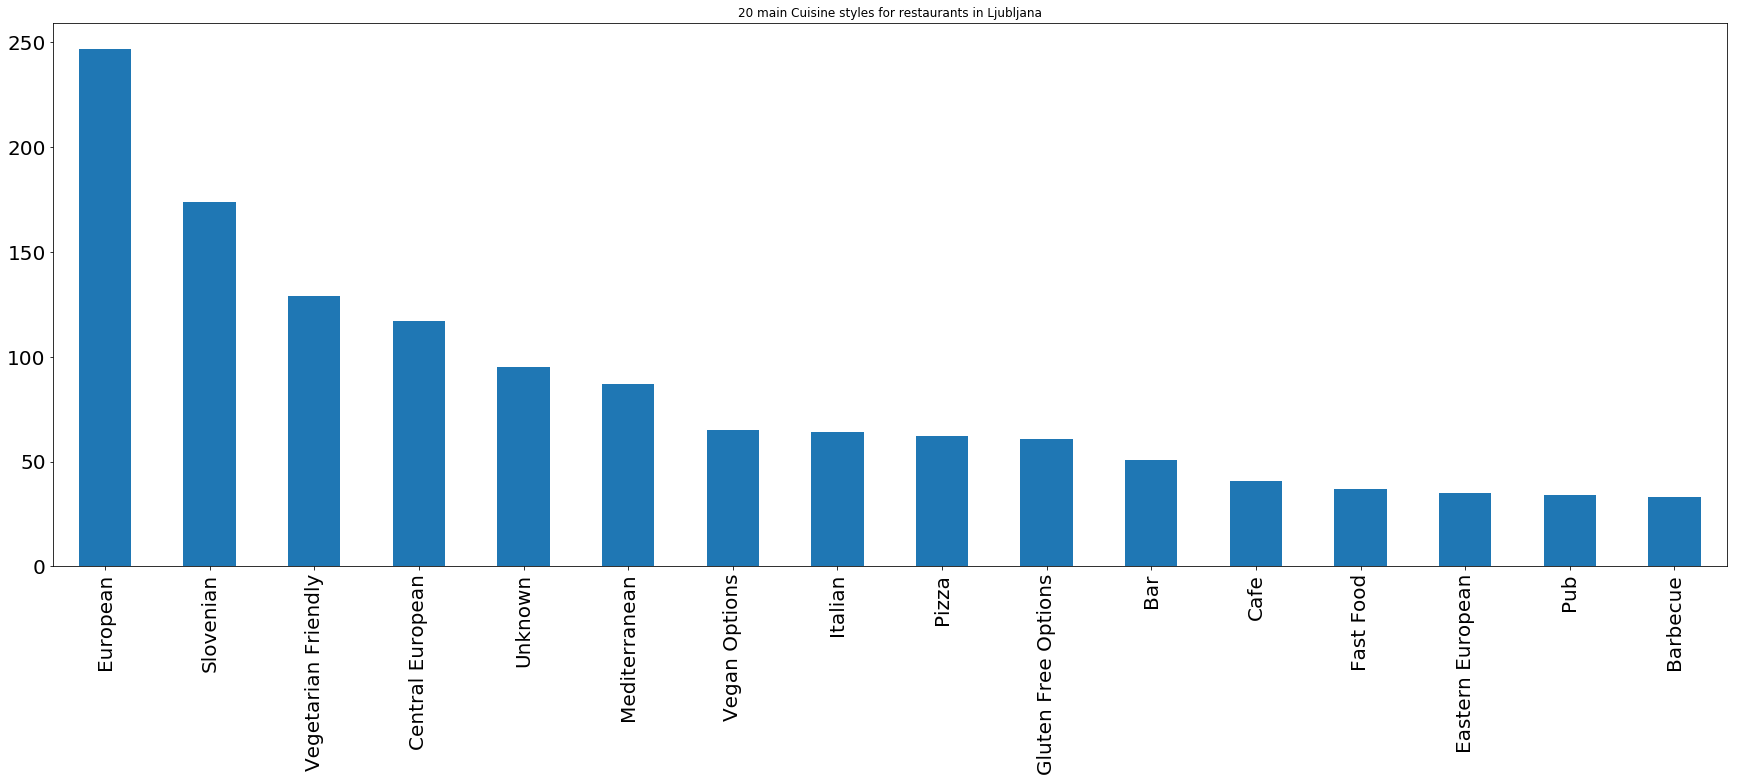

In [27]:
#Visualization of global cuisine styles count
pd.DataFrame(global_cuisine_count, index=['Global']).T.sort_values('Global', ascending=False).plot(kind='bar', figsize=(30,10), 
                                                            title='Global cuisine styles', sort_columns=True)
plt.savefig("figures/global cuiine count.svg")
plt.savefig("figures/global cuiine count.png")
plt.show()

#Visualization for each city for the 15 main cuisine styles in the city
for city in cuisine_count_df.index:
    cuisine_count_df.loc[city].sort_values(ascending=False).iloc[0:16].plot(kind='bar', 
                                                                            figsize=(30,10), fontsize=20,
                                                                            title='20 main Cuisine styles for restaurants in {}'.format(city))
    plt.savefig("figures/global cuiine count {}.svg".format(city))
    plt.savefig("figures/global cuiine count {}.png".format(city))
    plt.show()

### Special diets
- What are the best cities for special diets such as Vegetarian, Vegan, Gluten Free, Halal, Kosher ?

C:\Users\Damien\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


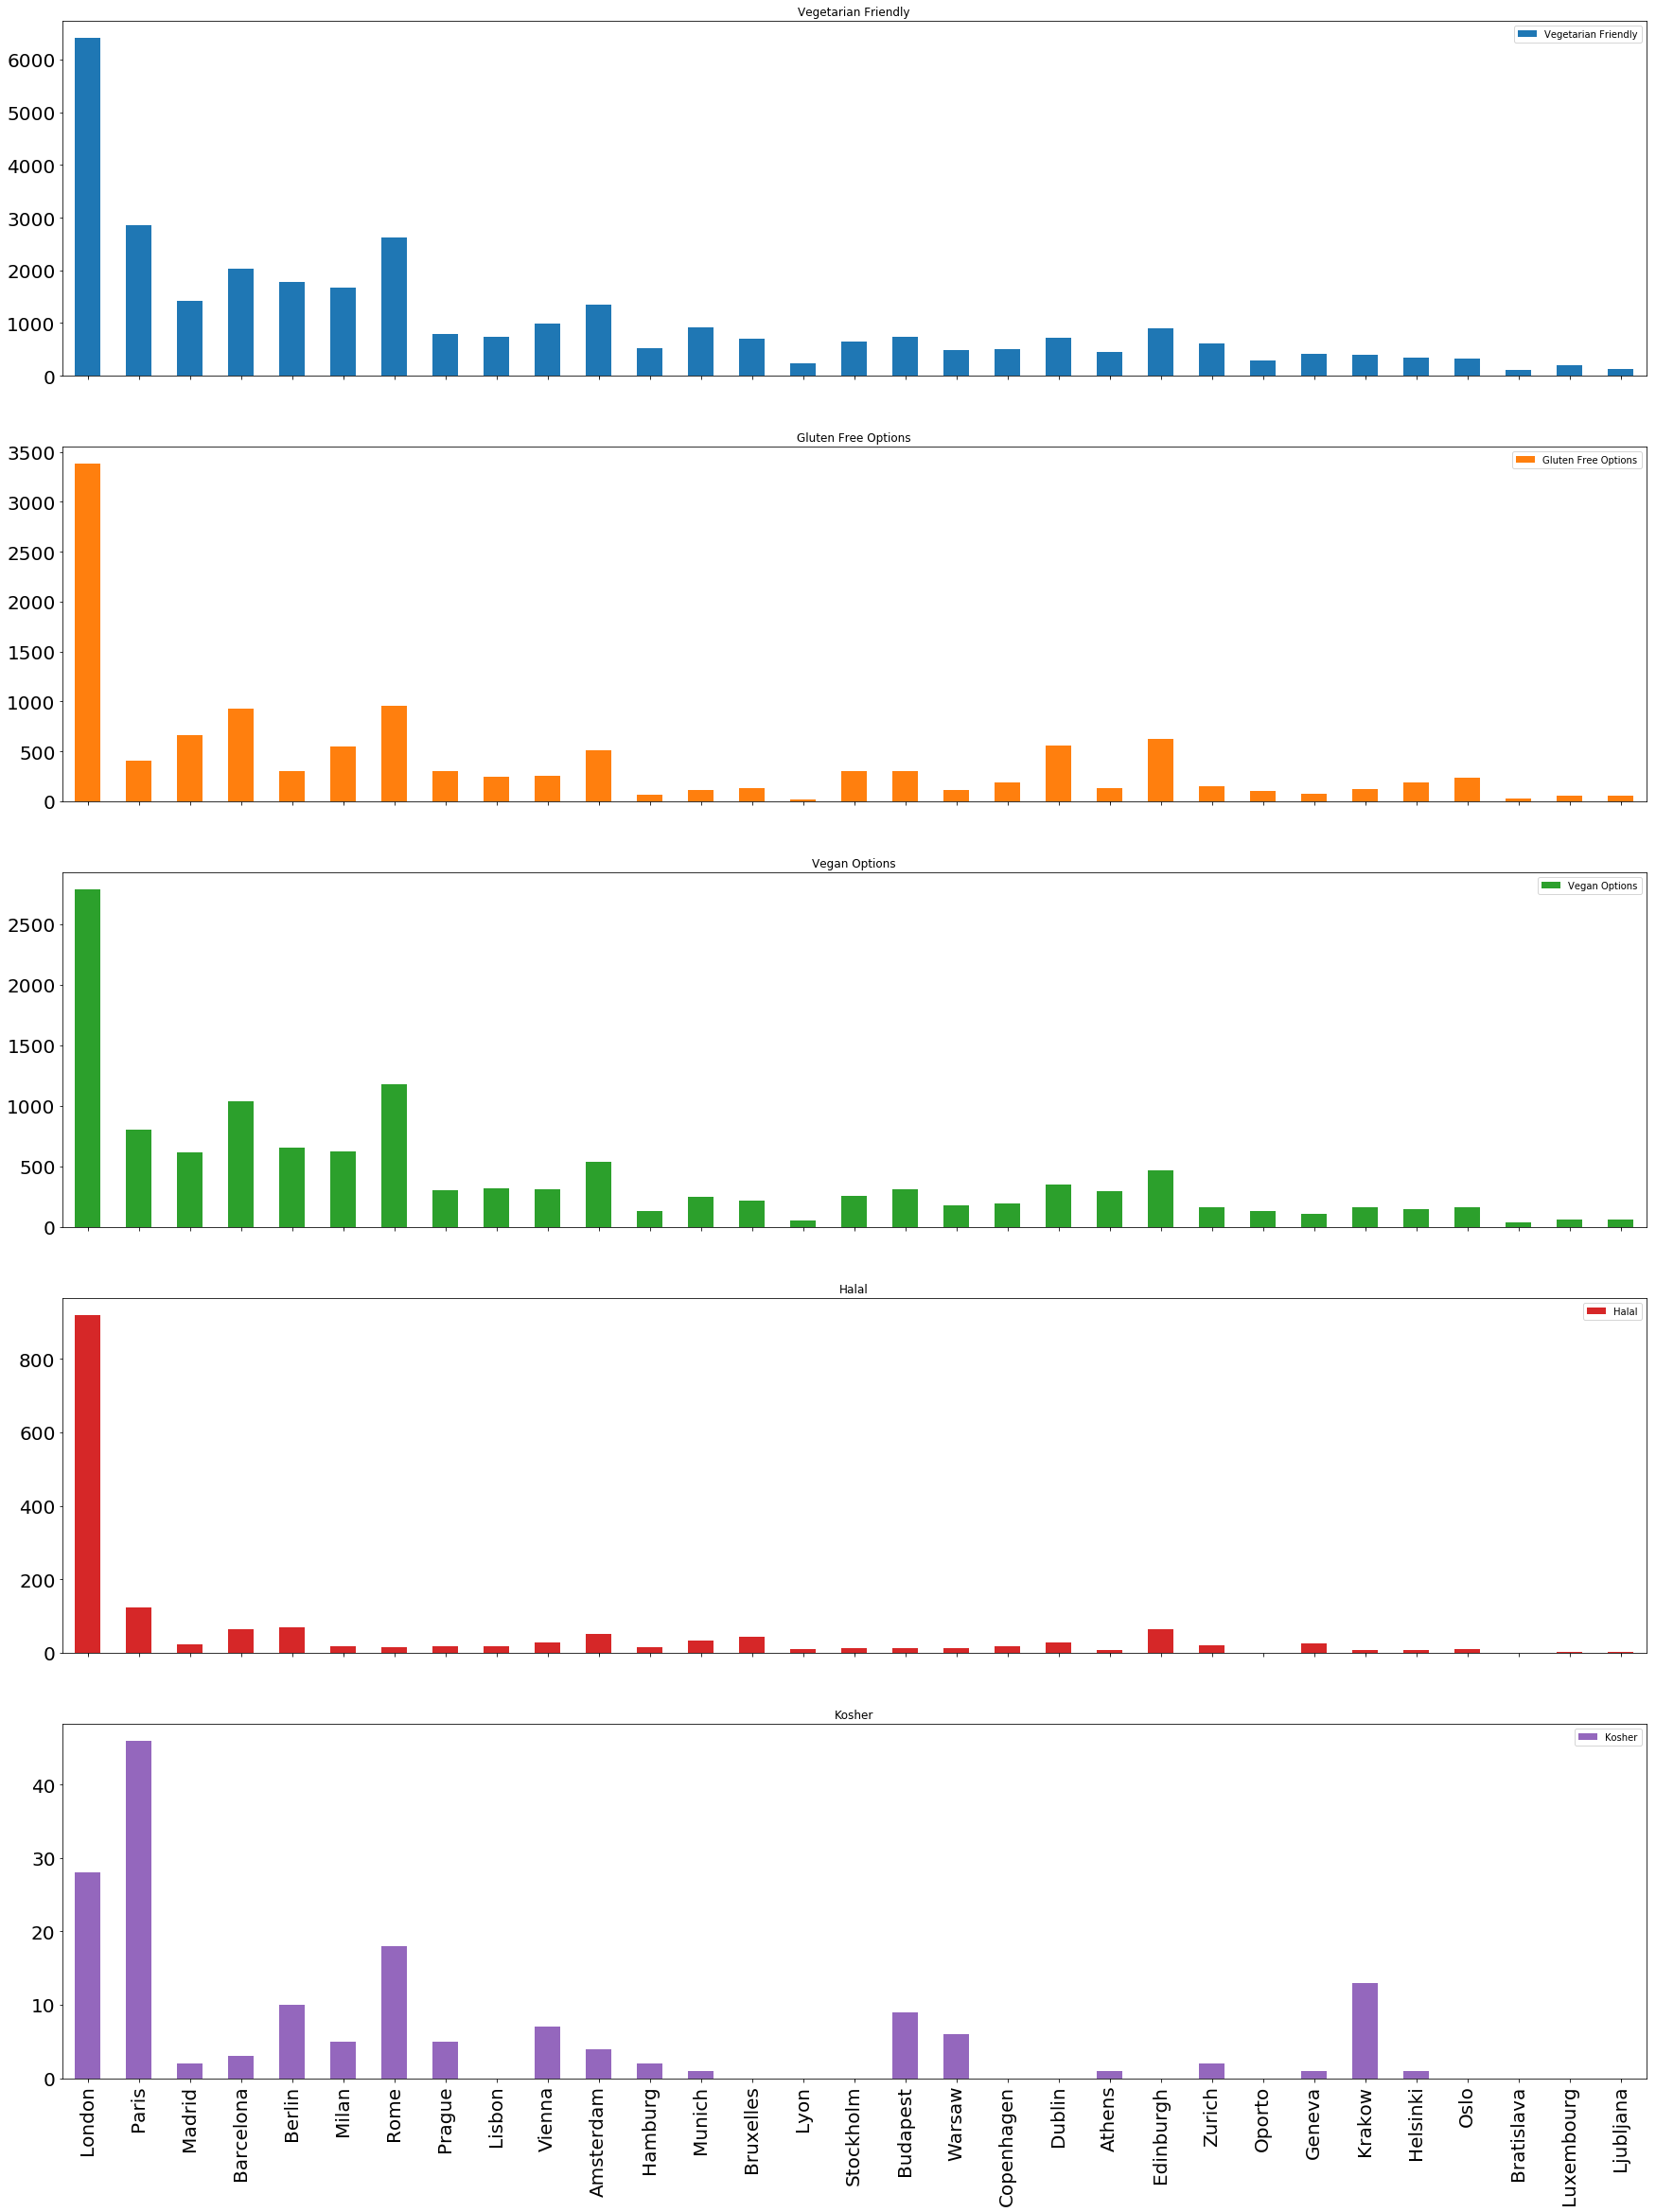

C:\Users\Damien\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Damien\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Damien\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

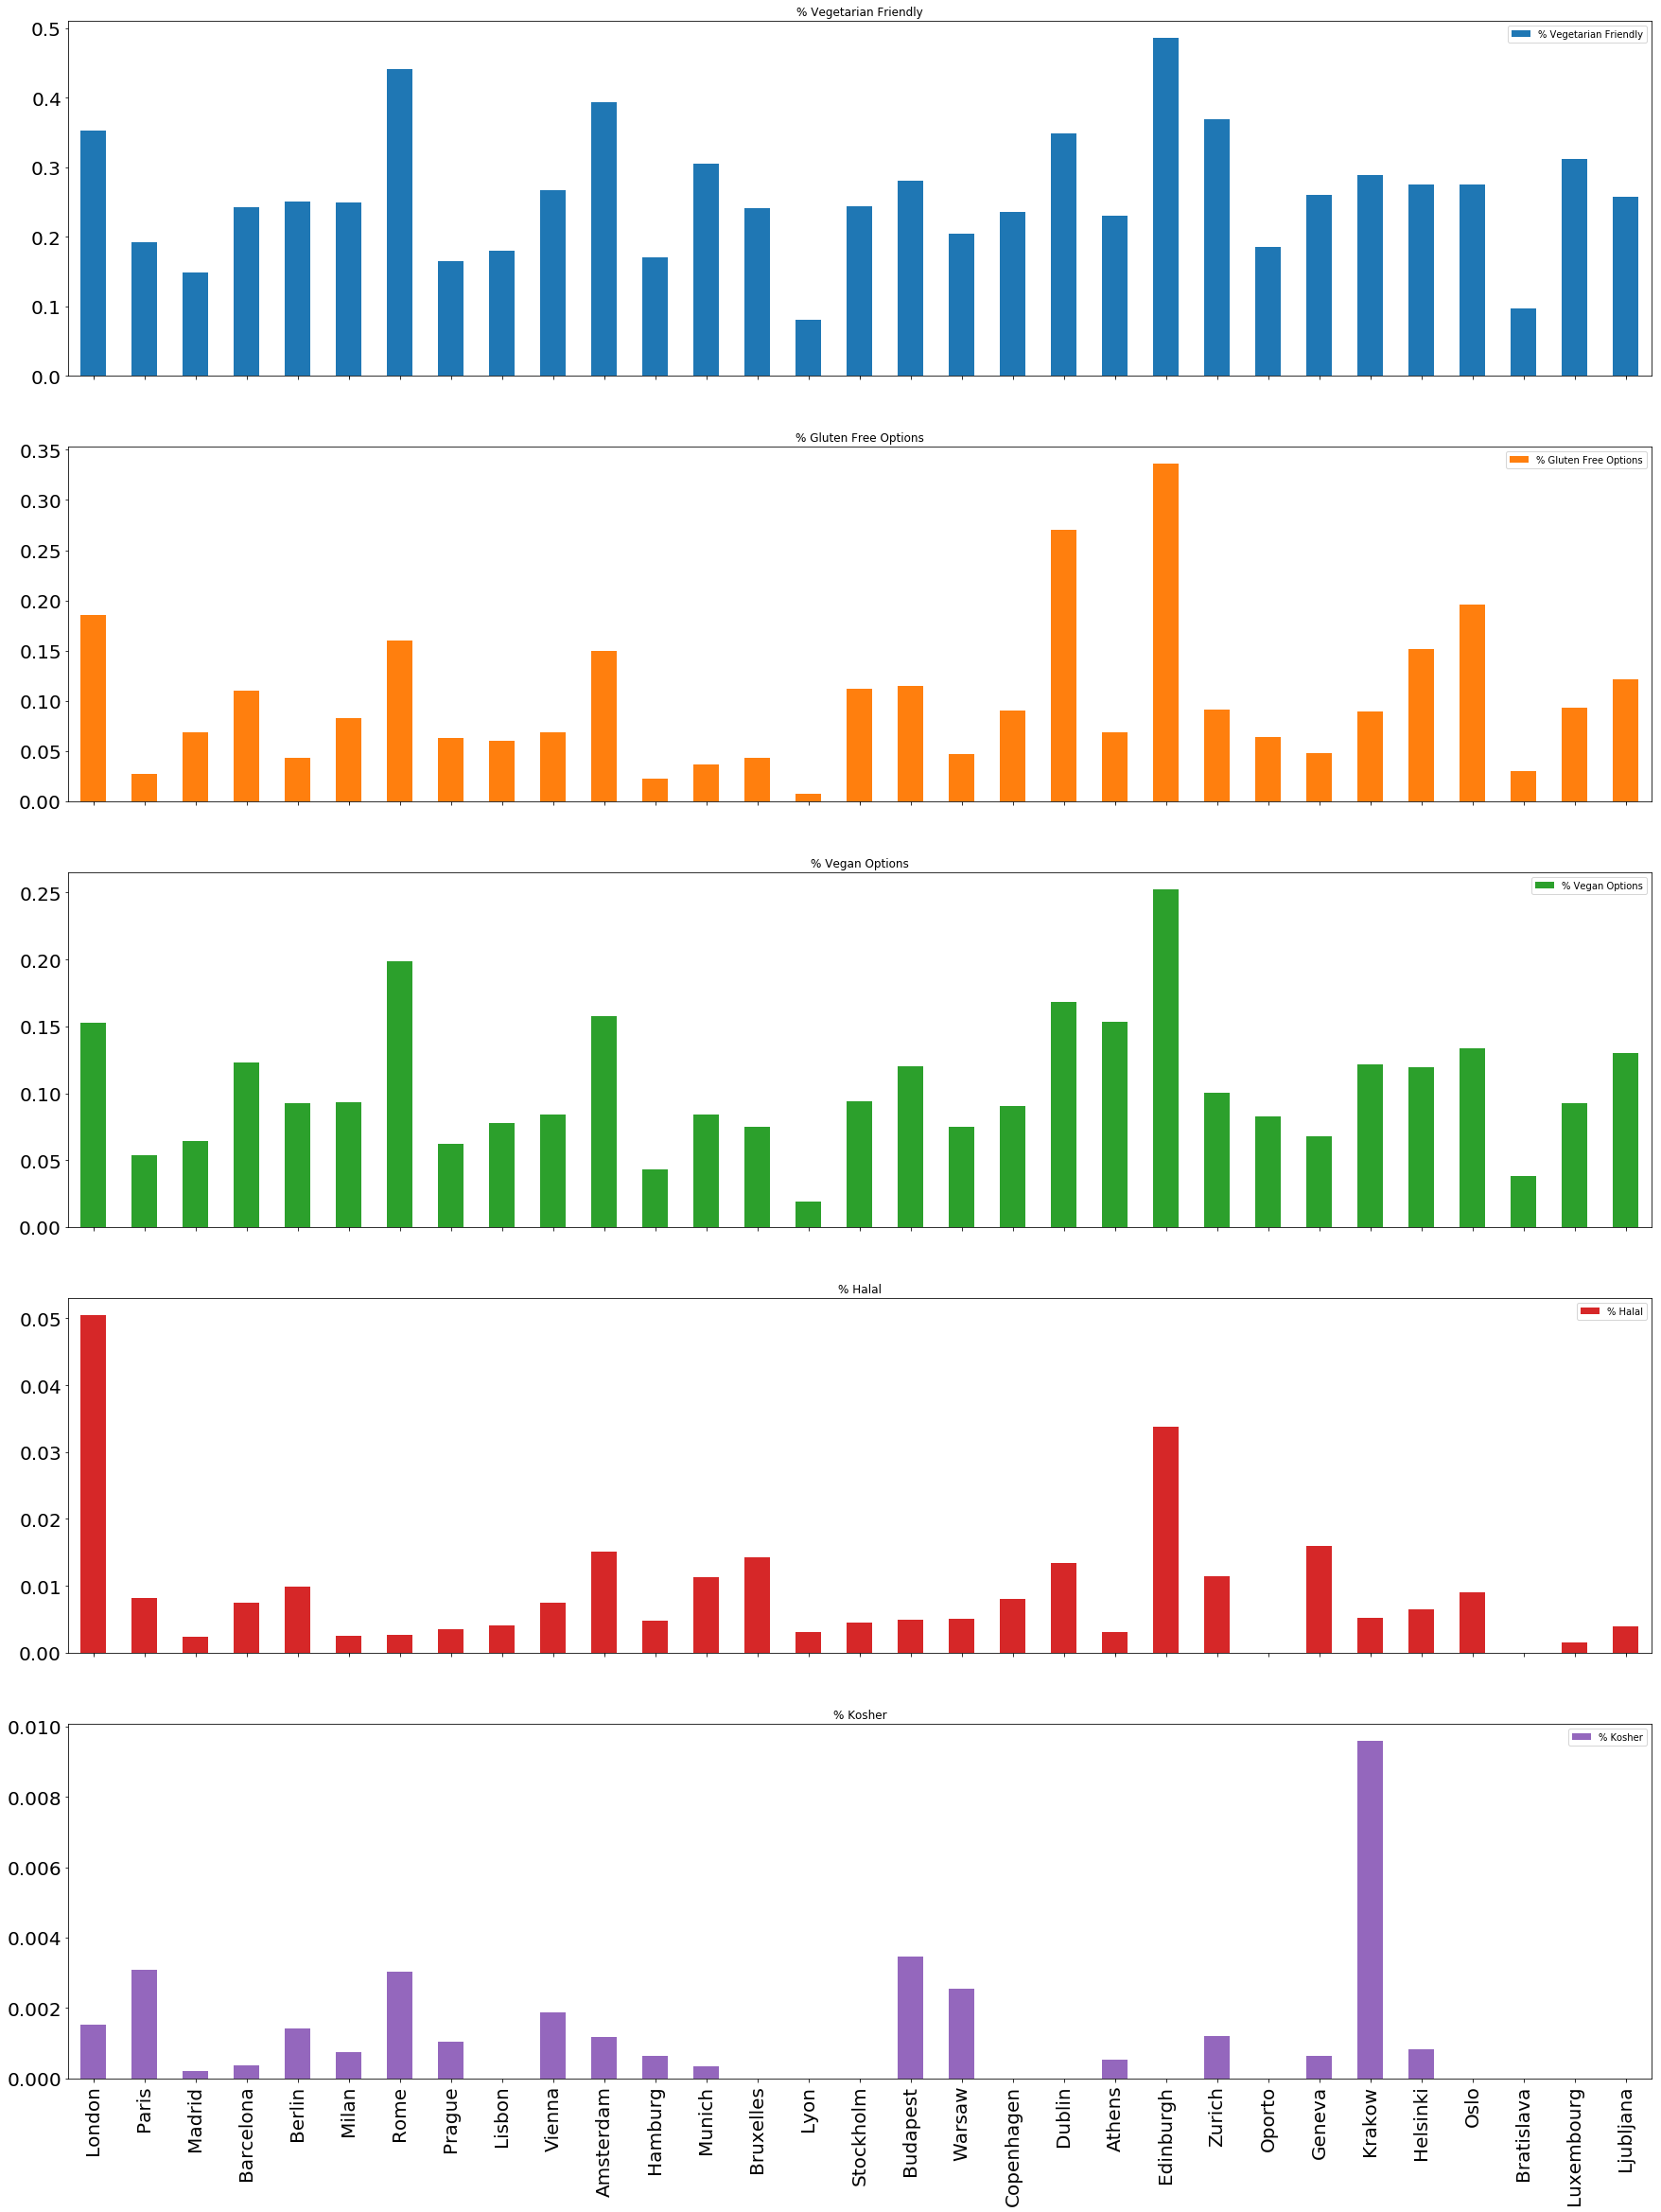

           Vegetarian Friendly  Gluten Free Options  Vegan Options  Halal  \
London                    6412                 3382           2786  920.0   
Paris                     2860                  412            802  122.0   
Madrid                    1422                  660            617   23.0   
Barcelona                 2039                  928           1038   63.0   
Berlin                    1778                  308            655   70.0   

           Kosher  Total Restaurants  % Vegetarian Friendly  \
London       28.0              18212               0.352076   
Paris        46.0              14874               0.192282   
Madrid        2.0               9543               0.149010   
Barcelona     3.0               8425               0.242018   
Berlin       10.0               7078               0.251201   

           % Gluten Free Options  % Vegan Options   % Halal  % Kosher  
London                  0.185702         0.152976  0.050516  0.001537  
Paris         

In [28]:
#Cities with the most of restaurants with special diets cuisine
special_count_df = cuisine_count_df[['Vegetarian Friendly', 'Gluten Free Options', 'Vegan Options', 'Halal', 'Kosher']]
special_count_df['Total Restaurants'] = global_number_rest
special_count_df.plot(kind='bar', subplots=True, figsize=(30,40), fontsize=20,
                      y=['Vegetarian Friendly', 'Gluten Free Options', 'Vegan Options', 'Halal', 'Kosher'])
plt.savefig("figures/special diets rest per city.svg")
plt.savefig("figures/special diets rest per city.png")
plt.show()

#With ratio out of total number of restaurants (normalized)
special_count_df['% Vegetarian Friendly'] = special_count_df['Vegetarian Friendly'] / global_number_rest
special_count_df['% Gluten Free Options'] = special_count_df['Gluten Free Options'] / global_number_rest
special_count_df['% Vegan Options'] = special_count_df['Vegan Options'] / global_number_rest
special_count_df['% Halal'] = special_count_df['Halal'] / global_number_rest
special_count_df['% Kosher'] = special_count_df['Kosher'] / global_number_rest
special_count_df.plot(kind='bar', subplots=True, figsize=(30,40), fontsize=20,
                      y=['% Vegetarian Friendly', '% Gluten Free Options', '% Vegan Options', '% Halal', '% Kosher'])
plt.savefig("figures/special diets rest per city_ratio.svg")
plt.savefig("figures/special diets rest per city_ratio.png")
plt.show()

print(special_count_df.head())
print(special_count_df.describe())

## Reviews analysis
- What is the number of reviews per city ? (Information about TA use intensity)
- What is the average number of reviews per restaurants a,d per reviewed restaurants ? (info about reviewing intensity)
- What price range category is more reviewed ?
- Are well ranked restaurants reviewed a lot or not ? (viz rank/number of reviews with lineplot)
- Is there a correlation between rank/number of reviews ? Rate/Number of reviews ?

In [72]:
#Global number of reviews and per price range
total_reviews = dataset['Number of Reviews'].sum()
total_reviews_pr = dataset.groupby('Price Range')['Number of Reviews'].sum()
total_reviews_pr = pd.DataFrame({'Number of Reviews': total_reviews_pr})
total_reviews_pr.index = ['low', 'mid', 'high', 'unknown']
#Add weighting by number of restaurants and reviewed restaurants
total_reviews_pr['Reviews/Restaurants'] = total_reviews_pr['Number of Reviews'] / global_pricerange_count.iloc[:, 0]
reviewed_restaurants_df = dataset[dataset['Number of Reviews'] >= 1]  #Subset with reviewed restaurants only
reviewed_restaurants_series =  reviewed_restaurants_df.groupby('Price Range').count()['Name']
reviewed_restaurants_series.index = ['low', 'mid', 'high', 'unknown']
total_reviews_pr['Reviews/Reviewed Restaurants'] = total_reviews_pr['Number of Reviews'] / reviewed_restaurants_series

print("Total number of reviews:", int(total_reviews))
print("Total number of reviews per price range: \n", total_reviews_pr, '\n')

#Total number of reviews per city
reviews_df = pd.DataFrame()
for city in global_number_rest.index:
    city_reviews = dataset[dataset['City'] == city]
    city_reviews = pd.DataFrame([city_reviews['Number of Reviews'].sum()], index=[city], columns=['Number of Reviews'])    
    reviews_df = pd.concat([reviews_df, city_reviews]) 
reviews_df = reviews_df.sort_values('Number of Reviews', ascending=False)

#Reviews per restaurants
reviews_df['Reviews/Restaurant'] = reviews_df['Number of Reviews'] / global_number_rest

#Reviews per reviewed restaurants
reviewed_restaurants_df = reviewed_restaurants_df.groupby('City').count()
reviews_df['Reviews/Reviewed Restaurant'] = reviews_df['Number of Reviews'] / reviewed_restaurants_df['Name']

#Reviews per price range
reviews_count_pr = dataset.groupby(['City', 'Price Range'])['Number of Reviews'].sum()
reviews_count_pr = reviews_count_pr.unstack(level='Price Range')
reviews_count_pr.columns = ['low price range', 'mid price range', 'high price range', 'unknown price range']
reviews_df = pd.concat([reviews_df, reviews_count_pr], axis=1)

print(reviews_df)
print('\n', reviews_df.describe())

Total number of reviews: 13544034
Total number of reviews per price range: 
          Number of Reviews  Reviews/Restaurants  Reviews/Reviewed Restaurants
low              1646445.0            86.709764                     93.330594
mid              9922396.0           182.675700                    188.947633
high             1482068.0           344.666977                    363.162950
unknown           493125.0            10.310383                     14.486633 

            Number of Reviews  Reviews/Restaurant  \
Amsterdam            414444.0          120.688410   
Athens               166935.0           86.137771   
Barcelona           1020548.0          121.133294   
Berlin               406937.0           57.493218   
Bratislava            41097.0           38.408411   
Bruxelles            267386.0           90.793209   
Budapest             335559.0          128.764006   
Copenhagen           187387.0           88.851114   
Dublin               313492.0          150.572526   
E

### Visualization

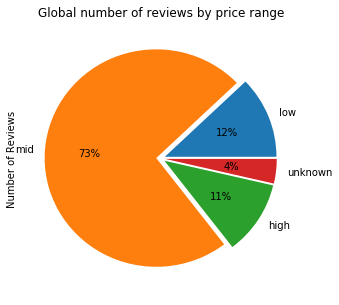

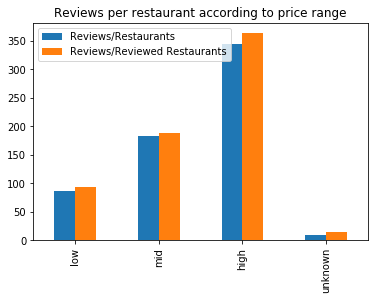

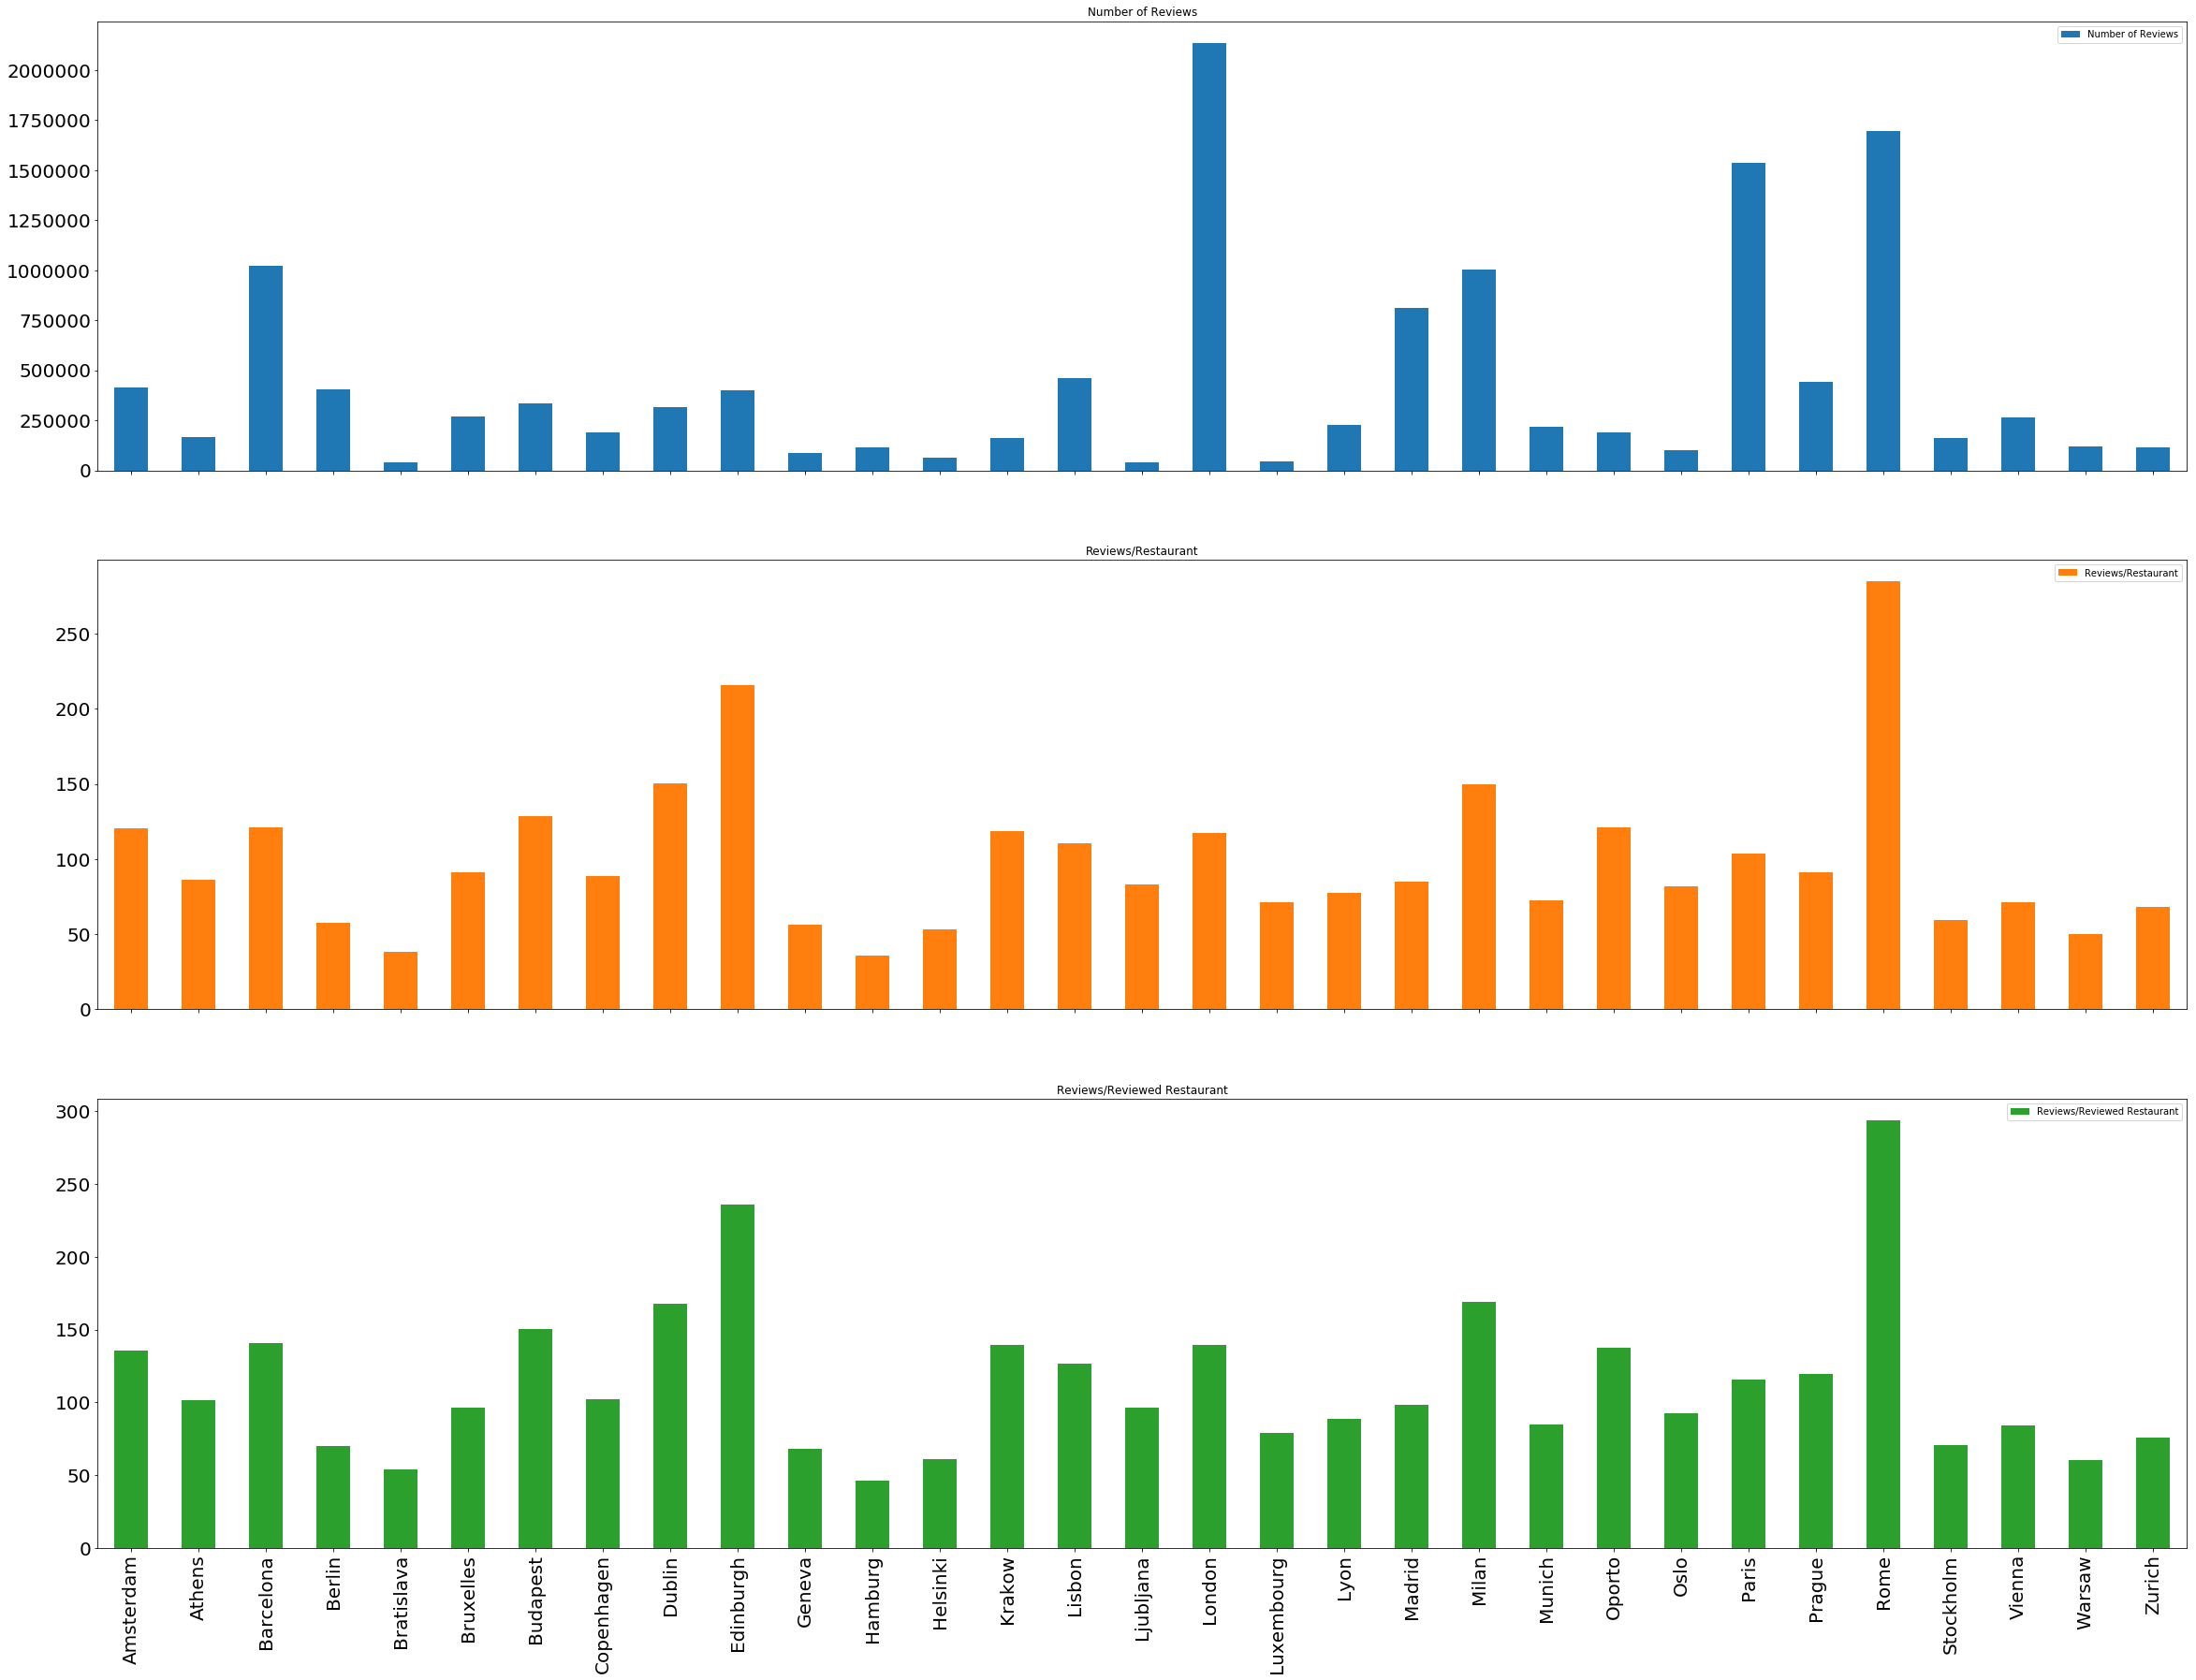

In [80]:
#Total reviews per price range in pie chart
total_reviews_pr.iloc[:,0].T.plot.pie(figsize=(5,5), legend=False, autopct='%.0f%%', explode=[0.04 for i in range(4)],
                        title="Global number of reviews by price range" )
plt.savefig("figures/reviews per pricerange.svg")
plt.savefig("figures/reviews per pricerange.png")
plt.show()

#Total reviews per price range per restaurants and reviewed restaurants
total_reviews_pr.iloc[:, 1:].plot(kind='bar', title="Reviews per restaurant according to price range")
plt.savefig("figures/reviews per restaurants per price range.svg")
plt.savefig("figures/reviews per restaurants per price range.png")
plt.show()

#Visualization of the dataframe containing the reviews dat per city
reviews_df.iloc[:, :3].plot(kind='bar', figsize=(40,30), fontsize=20, subplots=True)
plt.savefig("figures/reviews per city and restaurant.svg")
plt.savefig("figures/reviews per city and restaurant.png")
plt.show()


## Popularity of high and low range (3% and 15%)
- Are high price range restaurants:
    - well rated or ranked ?
    - popular (many reviews) ?
- Are low price range restaurants bad/well rated or ranked ?
    - well rated or ranked ?
    - Less popular (reviews under the mean number of reviews of the city) ?

### Low price range

In [21]:
#Subset the dataset with price range = $
dataset_lowpr = dataset[dataset['Price Range'] == '$']
print(dataset_lowpr.head(20))


                           Name       City  \
9       Rob Wigboldus Vishandel  Amsterdam   
16        Omelegg - City Centre  Amsterdam   
27            Omelegg - De Pijp  Amsterdam   
35                 Broodje Bert  Amsterdam   
36          Jacketz Nieuwendijk  Amsterdam   
37        Toastable Nieuwendijk  Amsterdam   
44           Frens Haringhandel  Amsterdam   
45                   Ivy & Bros  Amsterdam   
46   B&B Lunchroom Leidsestraat  Amsterdam   
47       Toastable Koningsplein  Amsterdam   
49                  Piadina Bar  Amsterdam   
54           Eetcafe Singel 404  Amsterdam   
67                      Hap-Hmm  Amsterdam   
71               Sugo Amsterdam  Amsterdam   
72                   Burger Bar  Amsterdam   
75               Prins Heerlijk  Amsterdam   
78  Vlaams Friteshuis Vleminckx  Amsterdam   
79               Bagels & Beans  Amsterdam   
85                   Burger Bar  Amsterdam   
96          Vegan Junk Food Bar  Amsterdam   

                                 

### High price range

In [23]:
#Subset the dataset with price range = $$$$
dataset_highpr = dataset[dataset['Price Range'] == '$$$$']
print(dataset_highpr.head(20))

                                               Name       City  \
1                               De Silveren Spiegel  Amsterdam   
2                                           La Rive  Amsterdam   
3                                          Vinkeles  Amsterdam   
4                         Librije's Zusje Amsterdam  Amsterdam   
5                              Ciel Bleu Restaurant  Amsterdam   
7    Blue Pepper Restaurant And Candlelight Cruises  Amsterdam   
8                     Teppanyaki Restaurant Sazanka  Amsterdam   
12                                  Restaurant Adam  Amsterdam   
14                               Restaurant Daalder  Amsterdam   
17                              Brasserie Ambassade  Amsterdam   
20                                Senses Restaurant  Amsterdam   
21                                    MOS Amsterdam  Amsterdam   
26                                         Bord'Eau  Amsterdam   
33                                    Midtown Grill  Amsterdam   
40        

## Analysis of 10 or 20 top restaurants of each city

In [46]:
#Common points in the top 10-20 restaurants of each city

- chck on the opposite way if having a restaurant with the most common cuisine style among the top ranked is a guarantee of success (rate)
- Check if the rarety of a cuisine style  is a guarantee for success